<a href="https://colab.research.google.com/github/chielgroen1998/MLOps/blob/main/run_without_featureselection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip3 install xgboost
!pip3 install pandas_ta==0.3.14b0
!pip3 install optuna
!pip3 install --upgrade pyspark==3.3.0 delta-spark==2.2.0
!pip3 install --upgrade numpy
!pip3 install --upgrade pandas_ta
!pip3 install statsmodels
!pip3 install arch
!pip3 install pytorch-forecasting
!pip3 install prophet
!pip3 install optuna
!pip3 install xgboost
!pip3 install torch
!pip3 install yfinance


In [ ]:
import pandas as pd
import numpy as np
np.NaN = np.nan
import pandas_ta as ta
import optuna
import logging
from datetime import timedelta


In [ ]:
import matplotlib.pyplot as plt

In [ ]:

# api_key = '832OZZOS1E3Z1RJR'
# symbols = ['LIT', 'REMX', 'URA', 'GDX', 'GDXJ', 'XLE', 'ICLN', 'SPY', 'GLD', 'CPER', 'USO', 'UNG', 'KOL', 'JJN']

# ts = TimeSeries(key=api_key, output_format='pandas')
# all_data = {}
# for symbol in symbols:
#     data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
#     # Filter data from 2018 onwards
#     data.index = pd.to_datetime(data.index)
#     data = data[data.index >= '2012-01-01']
#     all_data[symbol] = data
#     print(f"Data for {symbol}:")
#     print(data.head())  # Print the first few rows of the dataset
#     # Plot the data
#     data['4. close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
#     plt.xlabel('Date')
#     plt.ylabel('Closing Price')
#     plt.grid(True)
#     plt.show()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Data for QQQ:
Price           Close       High        Low       Open   Volume
Ticker            QQQ        QQQ        QQQ        QQQ      QQQ
Date                                                           
1999-03-10  43.282837  43.362304  42.620615  43.335815  5232000
1999-03-11  43.494747  43.852347  42.647103  43.600703  9688600
1999-03-12  42.435200  43.362311  42.090844  43.335822  8743600
1999-03-15  43.653656  43.706634  42.302724  42.753034  6369000
1999-03-16  44.024506  44.209928  43.362284  43.839084  4905800


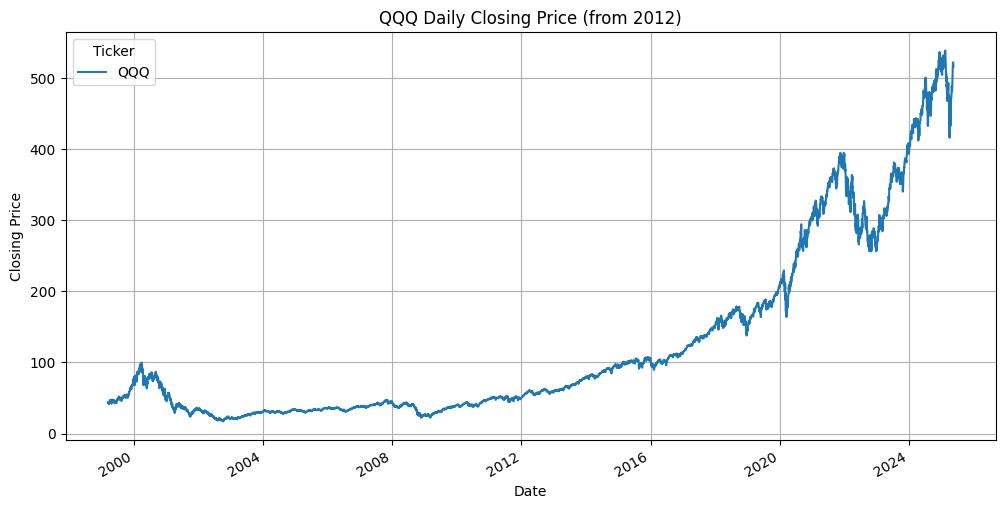

[*********************100%***********************]  1 of 1 completed


Data for AAPL:
Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
1996-06-03  0.185960  0.195352  0.185960  0.194413  125462400
1996-06-04  0.181734  0.183143  0.179386  0.180325  762238400
1996-06-05  0.188778  0.191596  0.182204  0.190657  510104000
1996-06-06  0.182204  0.189717  0.181264  0.187838  362096000
1996-06-07  0.183143  0.183143  0.176568  0.180325  267769600


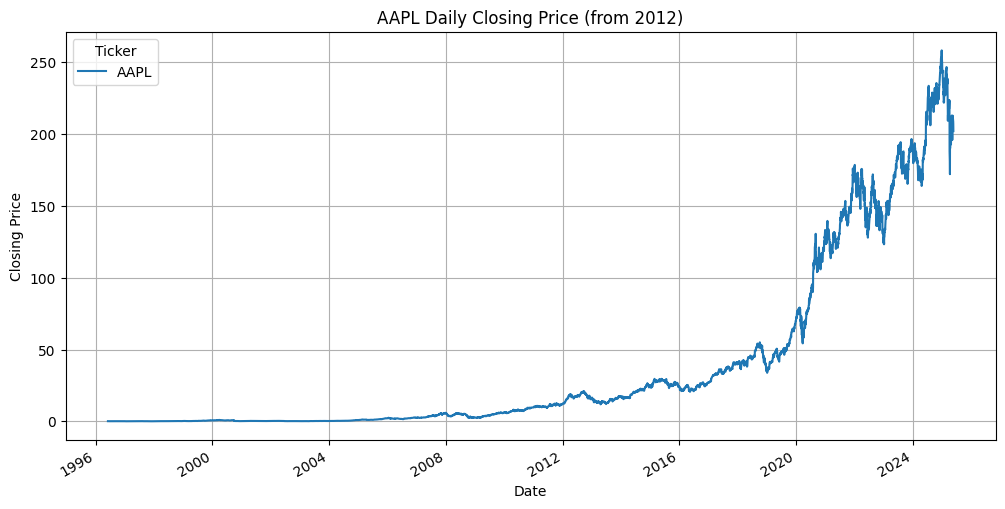

[*********************100%***********************]  1 of 1 completed


Data for MSFT:
Price          Close      High       Low      Open    Volume
Ticker          MSFT      MSFT      MSFT      MSFT      MSFT
Date                                                        
1996-06-03  4.535283  4.578385  4.525705  4.549650  31684800
1996-06-04  4.516127  4.554439  4.453868  4.544861  65852800
1996-06-05  4.631065  4.645432  4.516126  4.520915  50968000
1996-06-06  4.590357  4.712479  4.587963  4.664588  88136000
1996-06-07  4.645430  4.645430  4.506546  4.506546  70198400


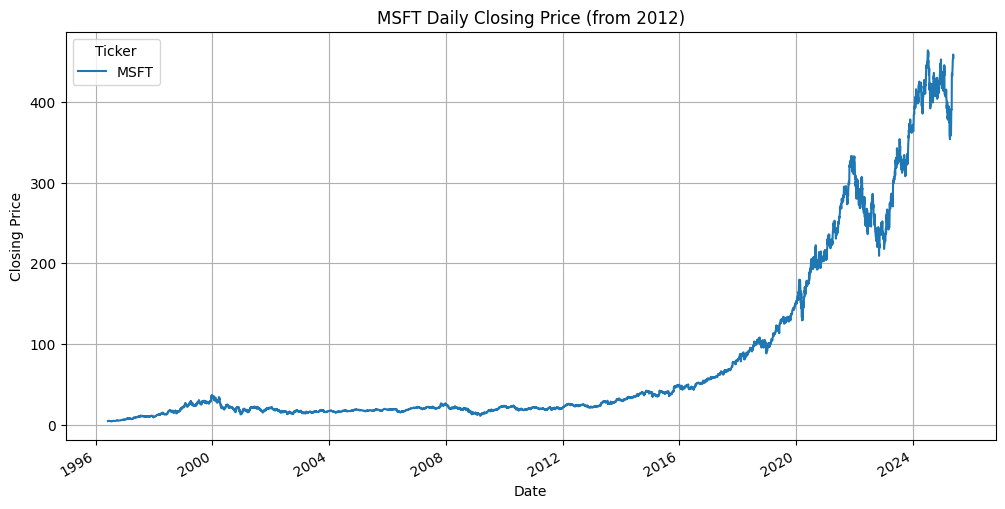

[*********************100%***********************]  1 of 1 completed


Data for AMZN:
Price          Close      High       Low      Open      Volume
Ticker          AMZN      AMZN      AMZN      AMZN        AMZN
Date                                                          
1997-05-15  0.097917  0.125000  0.096354  0.121875  1443120000
1997-05-16  0.086458  0.098958  0.085417  0.098438   294000000
1997-05-19  0.085417  0.088542  0.081250  0.088021   122136000
1997-05-20  0.081771  0.087500  0.081771  0.086458   109344000
1997-05-21  0.071354  0.082292  0.068750  0.081771   377064000


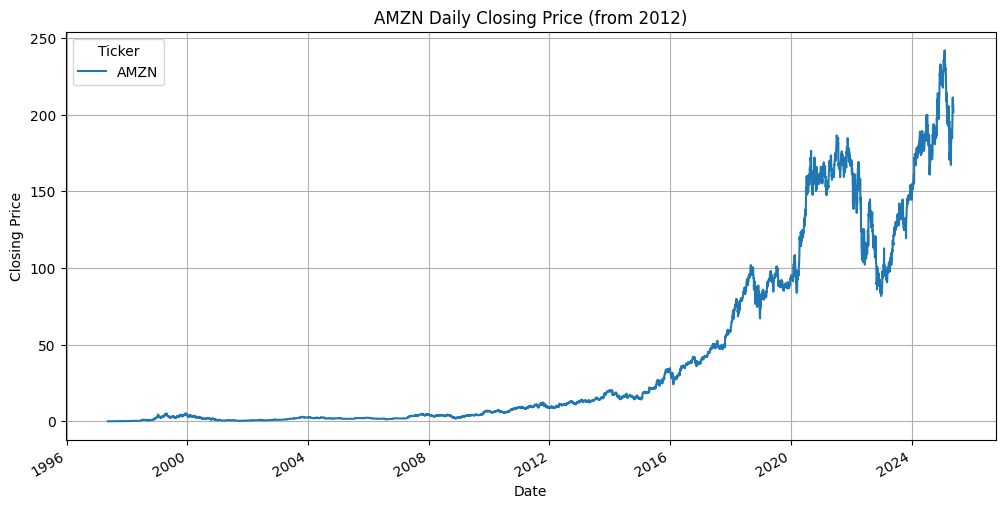

[*********************100%***********************]  1 of 1 completed


Data for GOOG:
Price          Close      High       Low      Open     Volume
Ticker          GOOG      GOOG      GOOG      GOOG       GOOG
Date                                                         
2004-08-19  2.487352  2.579567  2.378775  2.478923  897427216
2004-08-20  2.684922  2.704009  2.491318  2.503960  458857488
2004-08-23  2.711942  2.813082  2.703266  2.745407  366857939
2004-08-24  2.599647  2.766478  2.567420  2.757554  306396159
2004-08-25  2.627658  2.677238  2.575105  2.601877  184645512


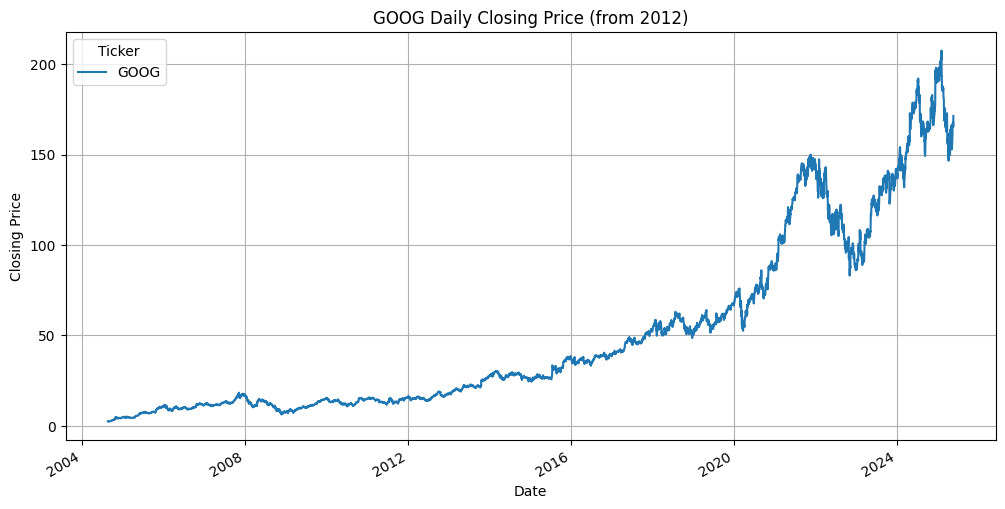

[*********************100%***********************]  1 of 1 completed


Data for GOOGL:
Price          Close      High       Low      Open     Volume
Ticker         GOOGL     GOOGL     GOOGL     GOOGL      GOOGL
Date                                                         
2004-08-19  2.499063  2.591713  2.389974  2.490595  893181924
2004-08-20  2.697563  2.716741  2.503048  2.515750  456686856
2004-08-23  2.724711  2.826327  2.715994  2.758334  365122512
2004-08-24  2.611887  2.779504  2.579510  2.770538  304946748
2004-08-25  2.640031  2.689843  2.587231  2.614129  183772044


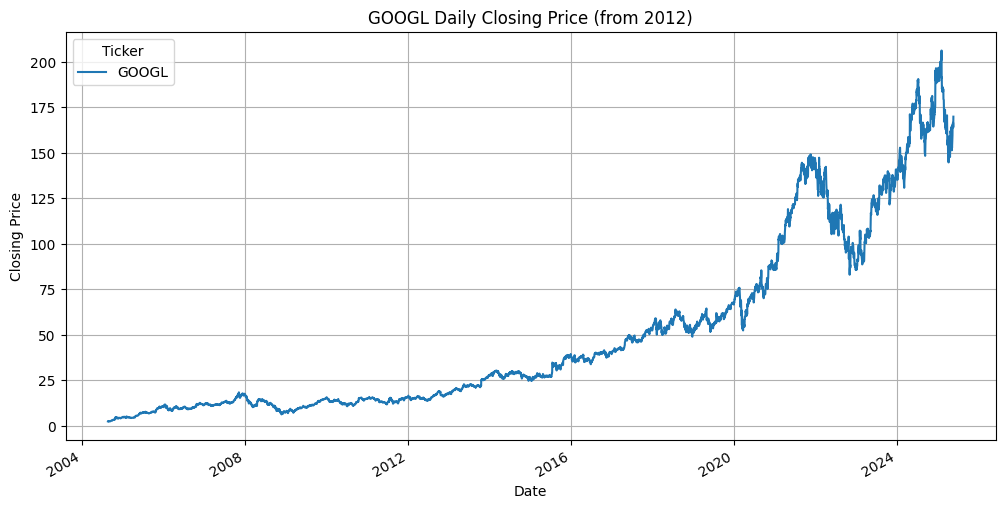

[*********************100%***********************]  1 of 1 completed


Data for NVDA:
Price          Close      High       Low      Open      Volume
Ticker          NVDA      NVDA      NVDA      NVDA        NVDA
Date                                                          
1999-01-22  0.037612  0.044775  0.035581  0.040119  2714688000
1999-01-25  0.041552  0.042029  0.037612  0.040597   510480000
1999-01-26  0.038328  0.042865  0.037731  0.042029   343200000
1999-01-27  0.038209  0.039403  0.036298  0.038447   244368000
1999-01-28  0.038089  0.038447  0.037850  0.038209   227520000


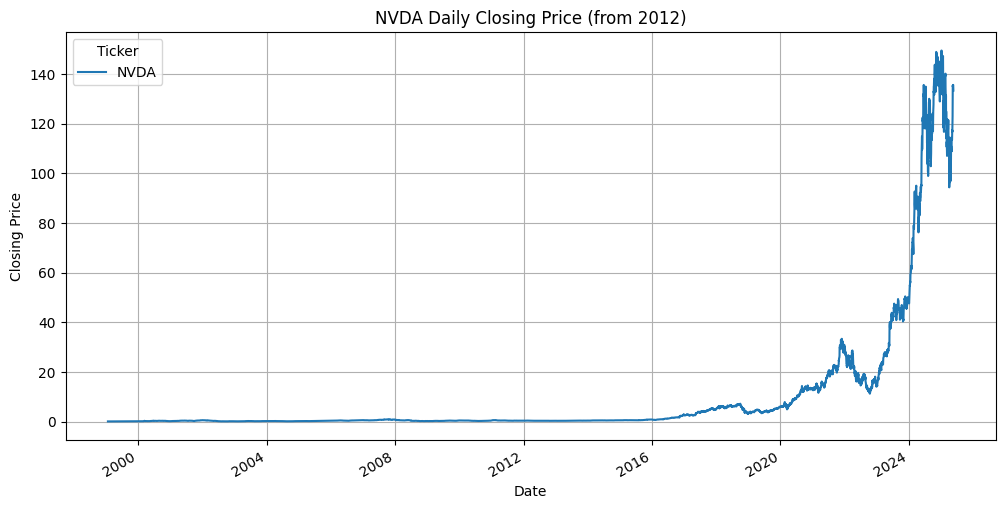

[*********************100%***********************]  1 of 1 completed


Data for META:
Price           Close       High        Low       Open     Volume
Ticker           META       META       META       META       META
Date                                                             
2012-05-18  38.050667  44.788910  37.821746  41.852747  573576400
2012-05-21  33.870369  36.488033  32.845202  36.358642  168192700
2012-05-22  30.854580  33.432430  30.794862  32.457028  101786600
2012-05-23  31.849892  32.347546  31.212894  31.222848   73600000
2012-05-24  32.875057  33.054213  31.620969  32.795434   50237200


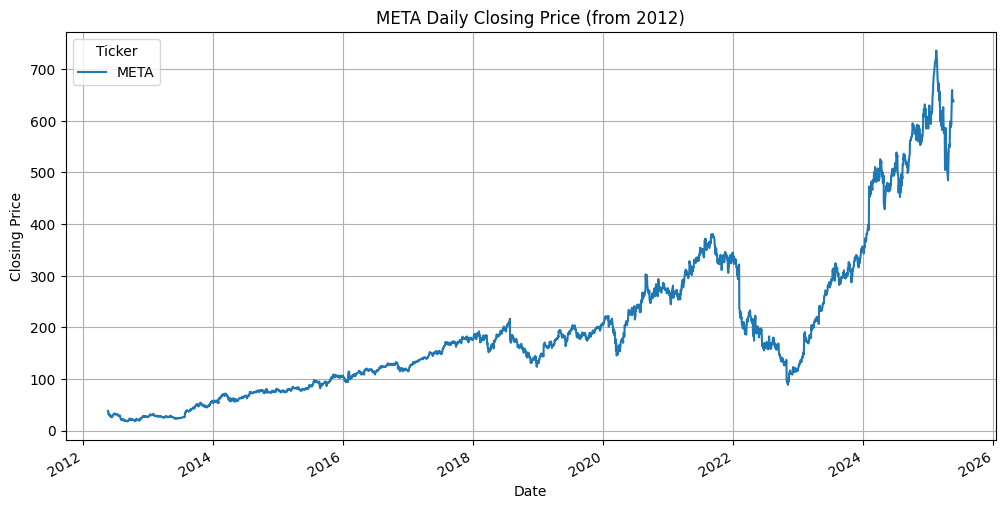

[*********************100%***********************]  1 of 1 completed


Data for TSLA:
Price          Close      High       Low      Open     Volume
Ticker          TSLA      TSLA      TSLA      TSLA       TSLA
Date                                                         
2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


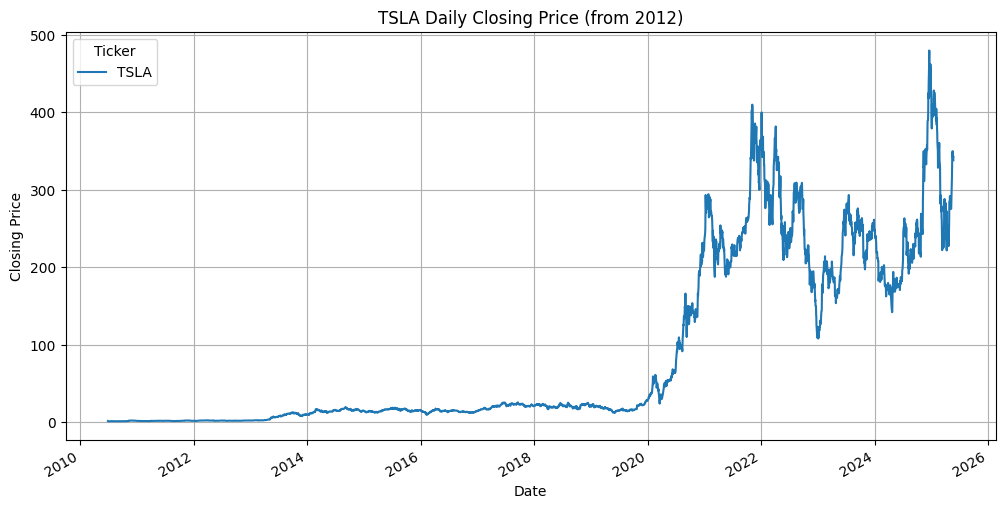

[*********************100%***********************]  1 of 1 completed


Data for AVGO:
Price          Close      High       Low      Open     Volume
Ticker          AVGO      AVGO      AVGO      AVGO       AVGO
Date                                                         
2009-08-06  1.146604  1.198336  1.102668  1.169281  241978000
2009-08-07  1.164321  1.187707  1.135975  1.144479   24543000
2009-08-10  1.131723  1.178494  1.106211  1.178494   24210000
2009-08-11  1.110463  1.133848  1.098415  1.132431   23054000
2009-08-12  1.133848  1.148021  1.109754  1.144478   14513000


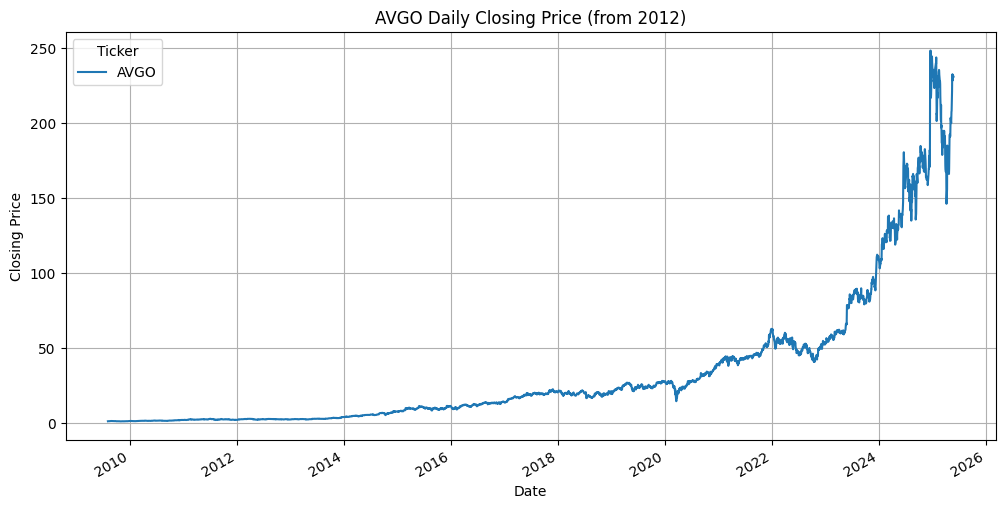

[*********************100%***********************]  1 of 1 completed


Data for COST:
Price          Close      High       Low      Open   Volume
Ticker          COST      COST      COST      COST     COST
Date                                                       
1996-06-03  6.825122  6.866994  6.573891  6.699507  2223800
1996-06-04  6.783247  6.908863  6.699504  6.825119  1437200
1996-06-05  7.013546  7.034482  6.825122  6.908866  5190400
1996-06-06  6.950738  7.118226  6.950738  6.992610  4661000
1996-06-07  6.908866  6.992610  6.783251  6.992610  2291200


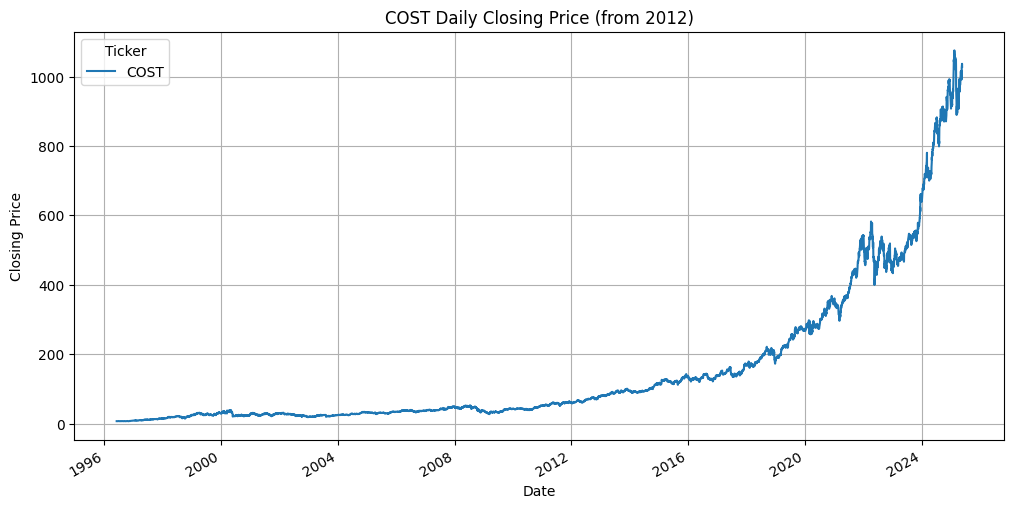

[*********************100%***********************]  1 of 1 completed


Data for PEP:
Price           Close       High        Low       Open   Volume
Ticker            PEP        PEP        PEP        PEP      PEP
Date                                                           
1996-06-03  15.509927  15.625673  15.220562  15.278435  2515000
1996-06-04  15.452053  15.625672  15.278434  15.509926  2943800
1996-06-05  15.621622  15.621622  15.389330  15.505476  2326600
1996-06-06  15.737768  15.970060  15.621622  15.679695  2891800
1996-06-07  15.679695  15.679695  15.215112  15.331257  3379200


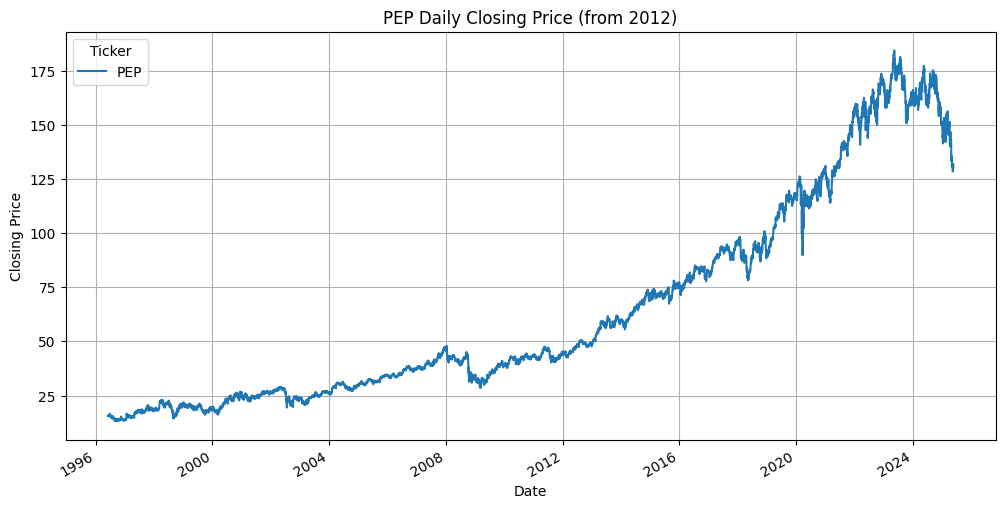

[*********************100%***********************]  1 of 1 completed


Data for CMCSA:
Price          Close      High       Low      Open   Volume
Ticker         CMCSA     CMCSA     CMCSA     CMCSA    CMCSA
Date                                                       
1996-06-03  1.991348  2.034639  1.991348  2.020209  1144200
1996-06-04  2.012994  2.020209  1.976919  1.976919   495000
1996-06-05  2.037209  2.051657  2.008312  2.008312   432000
1996-06-06  2.044432  2.066105  2.022760  2.051656  1179000
1996-06-07  2.029984  2.037209  1.993864  2.008312  1800000


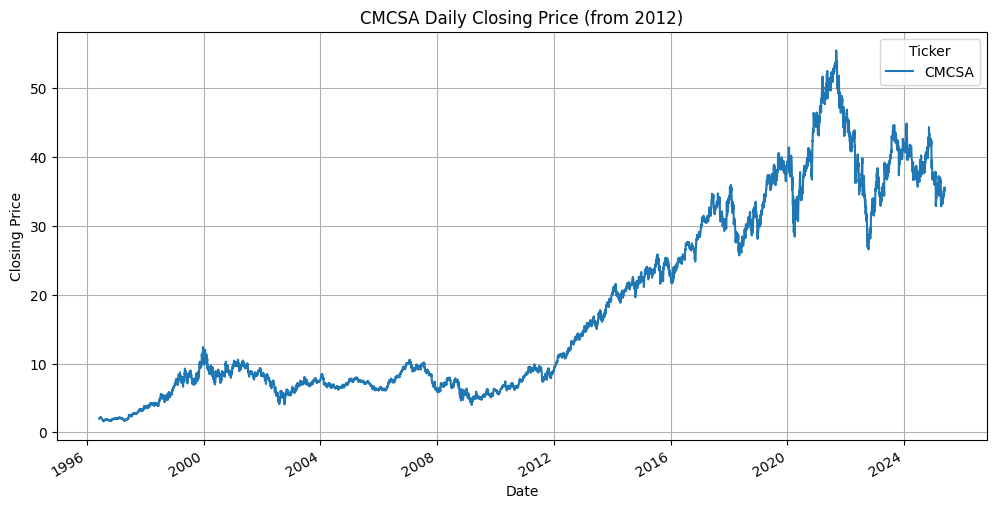

[*********************100%***********************]  1 of 1 completed


Data for ADBE:
Price          Close      High       Low      Open    Volume
Ticker          ADBE      ADBE      ADBE      ADBE      ADBE
Date                                                        
1996-06-03  4.416188  4.568998  4.400907  4.523155   8892000
1996-06-04  4.385626  4.492593  4.339784  4.462031   8717600
1996-06-05  4.492593  4.553717  4.347424  4.385626  10564000
1996-06-06  4.286303  4.523157  4.263381  4.492595  11274400
1996-06-07  4.324502  4.355064  4.095288  4.186974  14816800


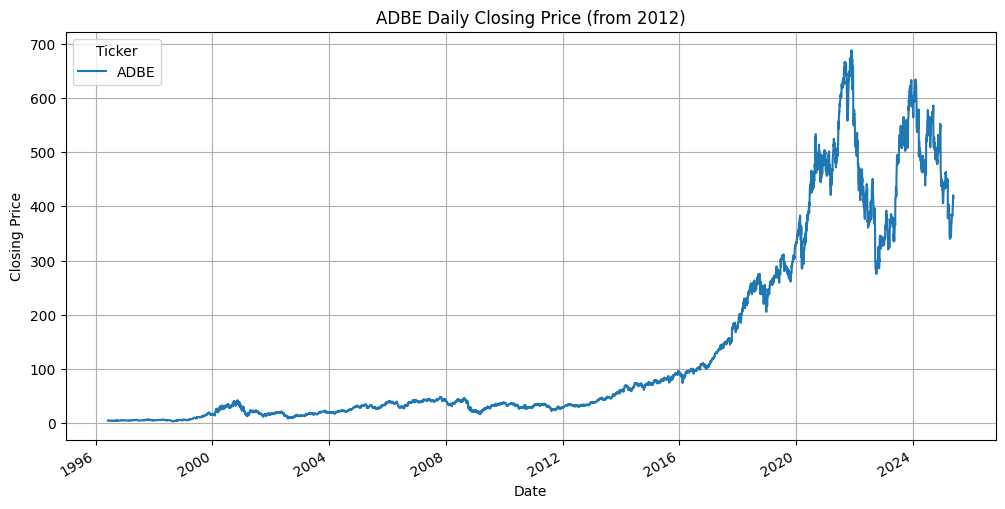

[*********************100%***********************]  1 of 1 completed


Data for CSCO:
Price          Close      High       Low      Open    Volume
Ticker          CSCO      CSCO      CSCO      CSCO      CSCO
Date                                                        
1996-06-03  4.078282  4.086283  3.967410  4.005129  46866600
1996-06-04  4.078282  4.096570  4.041705  4.078282  38531700
1996-06-05  4.178866  4.178866  4.023416  4.087425  42633900
1996-06-06  4.069136  4.215442  4.069136  4.206298  52195500
1996-06-07  4.087426  4.096570  3.950264  3.968552  47823300


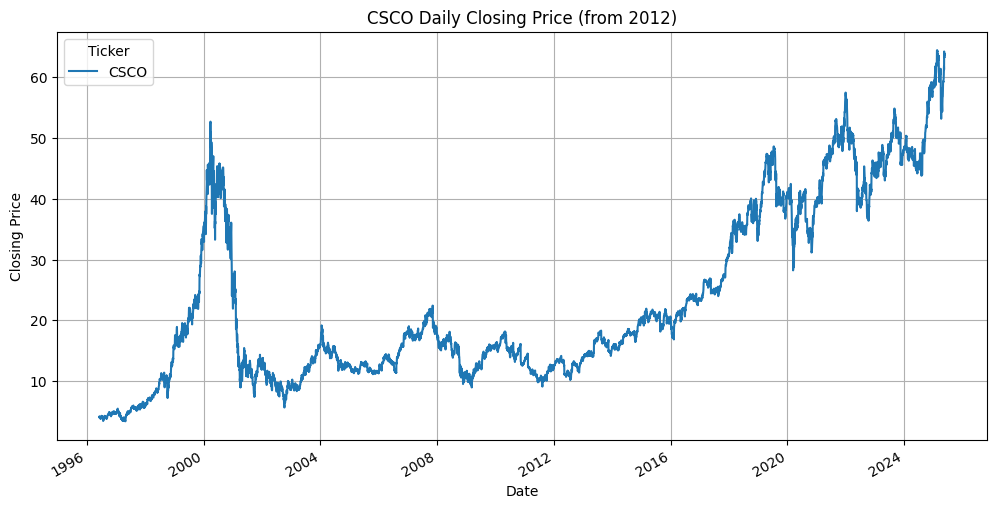

[*********************100%***********************]  1 of 1 completed


Data for INTC:
Price          Close      High       Low      Open    Volume
Ticker          INTC      INTC      INTC      INTC      INTC
Date                                                        
1996-06-03  5.409341  5.435814  5.276975  5.303448  69614400
1996-06-04  5.387280  5.471111  5.356395  5.435814  56274400
1996-06-05  5.426988  5.435812  5.338744  5.365218  35413600
1996-06-06  5.312274  5.471113  5.303450  5.453464  51574400
1996-06-07  5.312274  5.329923  5.188733  5.207485  70562400


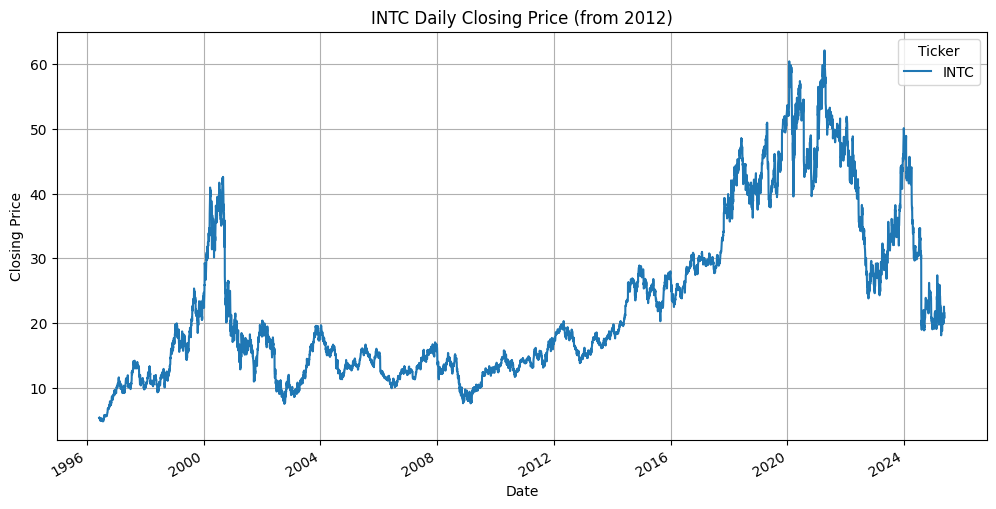

[*********************100%***********************]  1 of 1 completed


Data for NFLX:
Price          Close      High       Low      Open     Volume
Ticker          NFLX      NFLX      NFLX      NFLX       NFLX
Date                                                         
2002-05-23  1.196429  1.242857  1.145714  1.156429  104790000
2002-05-24  1.210000  1.225000  1.197143  1.214286   11104800
2002-05-28  1.157143  1.232143  1.157143  1.213571    6609400
2002-05-29  1.103571  1.164286  1.085714  1.164286    6757800
2002-05-30  1.071429  1.107857  1.071429  1.107857   10154200


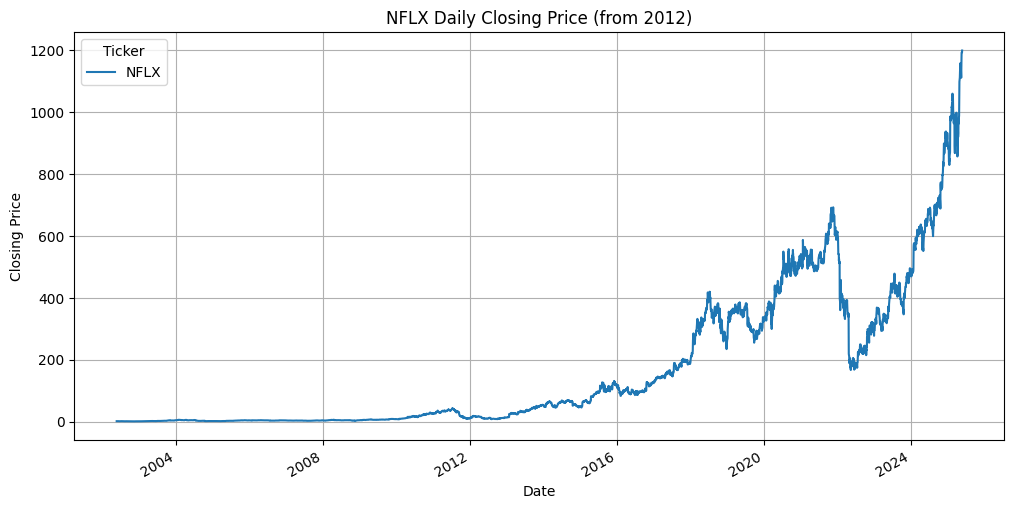

[*********************100%***********************]  1 of 1 completed


Data for AMGN:
Price           Close       High        Low       Open   Volume
Ticker           AMGN       AMGN       AMGN       AMGN     AMGN
Date                                                           
1996-06-03  10.210395  10.329246  10.156372  10.286027  4328000
1996-06-04  10.286024  10.307633  10.156368  10.221196  4850800
1996-06-05  10.437295  10.480514  10.329248  10.350858  4108000
1996-06-06  10.458902  10.566949  10.415684  10.480512  6406000
1996-06-07  10.307637  10.437293  10.199591  10.415684  6503600


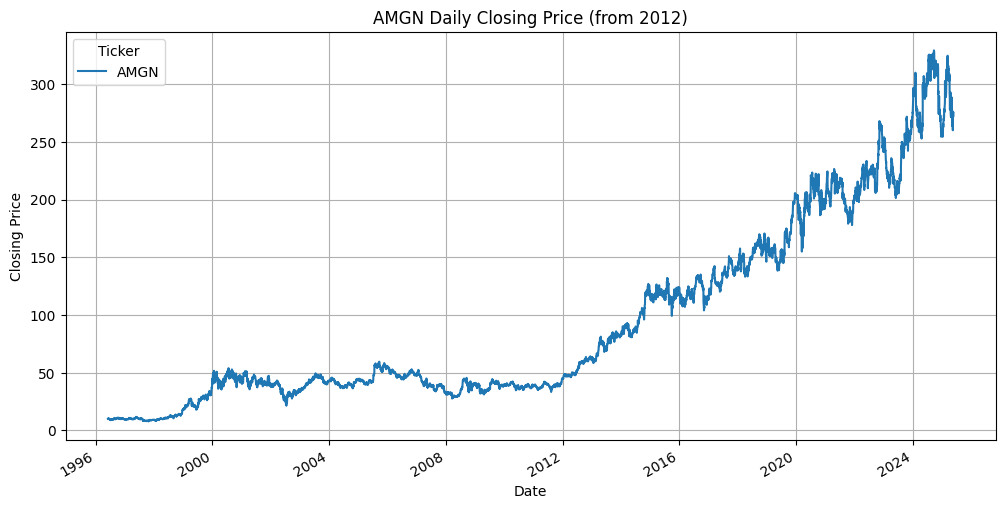

[*********************100%***********************]  1 of 1 completed


Data for PYPL:
Price           Close       High        Low       Open   Volume
Ticker           PYPL       PYPL       PYPL       PYPL     PYPL
Date                                                           
2015-07-06  36.709999  39.750000  36.000000  38.000000  5866600
2015-07-07  36.619999  37.810001  36.000000  37.720001  7359000
2015-07-08  34.700001  36.360001  34.529999  36.340000  5387700
2015-07-09  34.500000  35.520000  33.990002  35.099998  3760100
2015-07-10  34.689999  35.189999  33.980000  34.660000  4472800


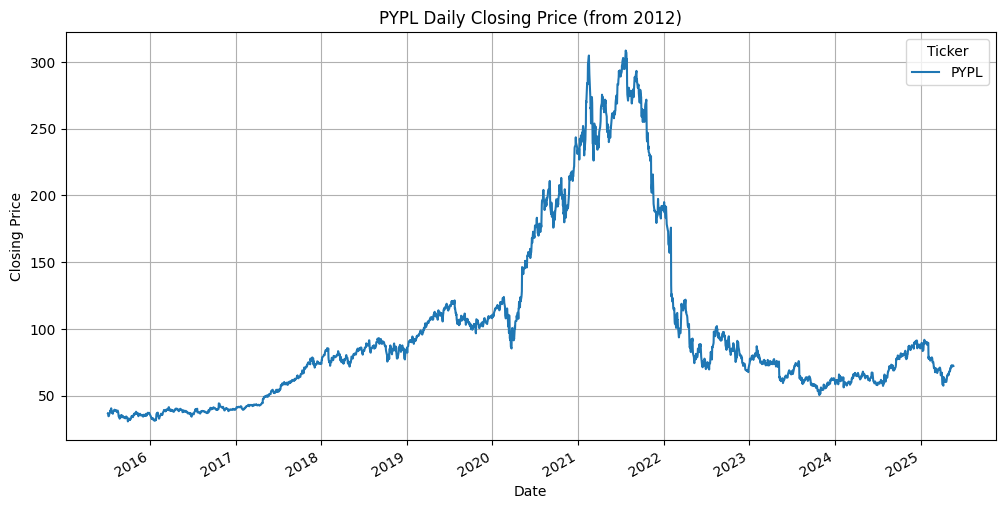

[*********************100%***********************]  1 of 1 completed


Data for QCOM:
Price          Close      High       Low      Open    Volume
Ticker          QCOM      QCOM      QCOM      QCOM      QCOM
Date                                                        
1996-06-03  1.992739  2.055313  1.992739  2.050499  27022400
1996-06-04  2.031245  2.050499  1.992738  1.992738  18960000
1996-06-05  2.007179  2.026432  1.992738  2.021619  15360000
1996-06-06  1.968672  2.055313  1.968672  2.021619  21937600
1996-06-07  2.007179  2.007179  1.901284  1.925351  21294400


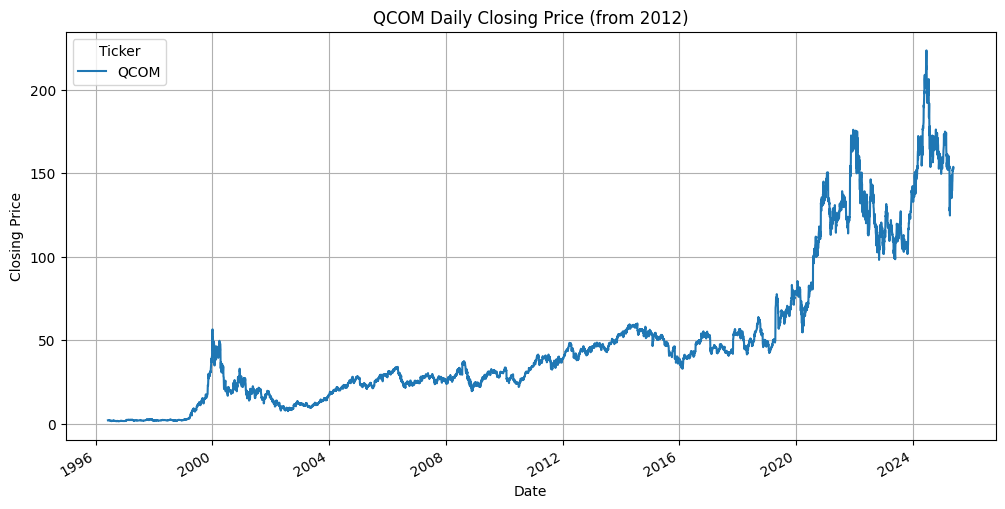

[*********************100%***********************]  1 of 1 completed


Data for TXN:
Price          Close      High       Low      Open    Volume
Ticker           TXN       TXN       TXN       TXN       TXN
Date                                                        
1996-06-03  4.210504  4.296044  4.200999  4.267531   7408000
1996-06-04  4.143970  4.248520  4.134465  4.248520  11207200
1996-06-05  4.153474  4.172483  4.134465  4.153474   8502400
1996-06-06  4.029917  4.181990  4.029917  4.181990   8813600
1996-06-07  4.124963  4.134467  3.982395  4.001404  13930400


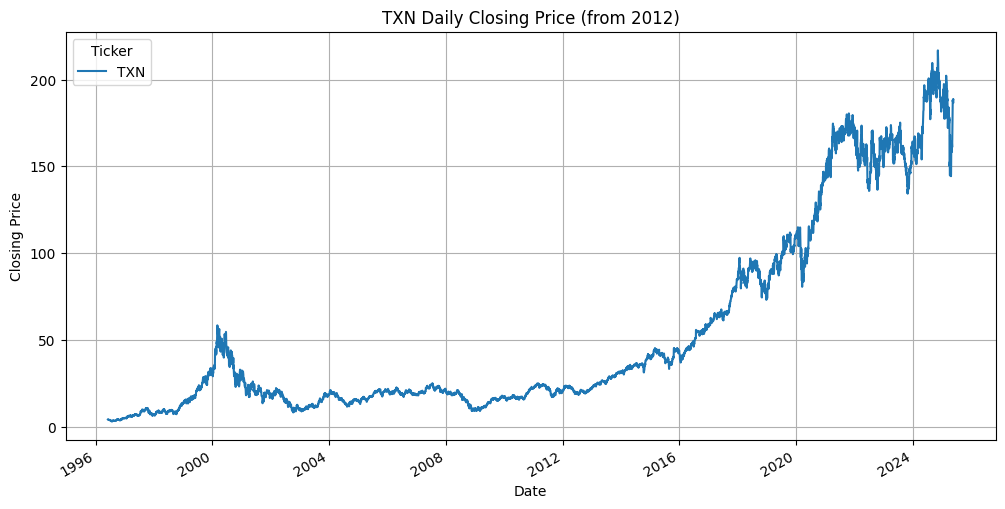

[*********************100%***********************]  1 of 1 completed


Data for SBUX:
Price          Close      High       Low      Open    Volume
Ticker          SBUX      SBUX      SBUX      SBUX      SBUX
Date                                                        
1996-06-03  1.265899  1.283645  1.248153  1.283645   2979200
1996-06-04  1.242237  1.271814  1.230406  1.265899   6142400
1996-06-05  1.295476  1.319137  1.230406  1.230406  12249600
1996-06-06  1.248153  1.325053  1.248153  1.307307  11139200
1996-06-07  1.236321  1.259983  1.206744  1.206744  15395200


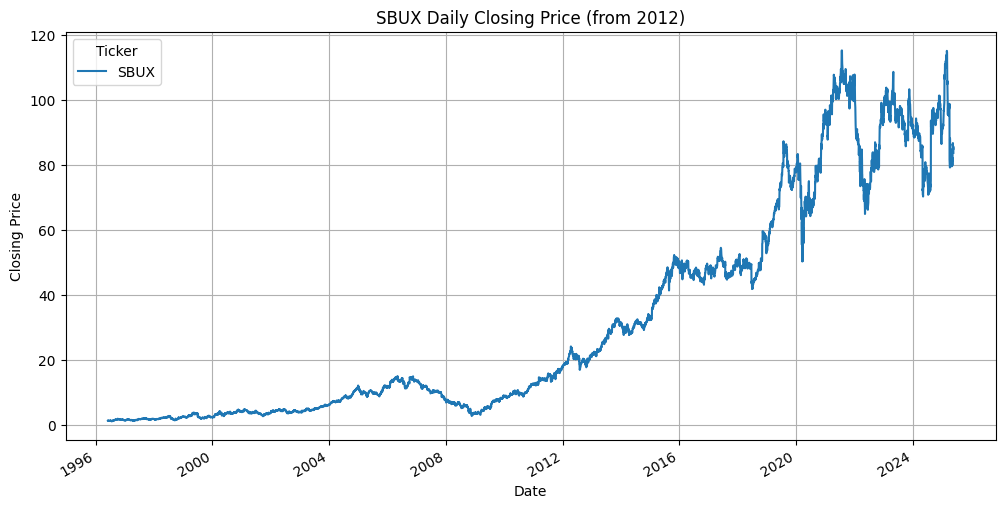

[*********************100%***********************]  1 of 1 completed


Data for MDLZ:
Price           Close       High        Low       Open    Volume
Ticker           MDLZ       MDLZ       MDLZ       MDLZ      MDLZ
Date                                                            
2001-06-13  11.520416  11.796906  11.461432  11.612580  69567200
2001-06-14  11.114899  11.428254  10.875274  11.428254  31979800
2001-06-15  11.280792  11.336090  11.041168  11.059600  14369300
2001-06-18  11.177569  11.280793  11.081719  11.081719   4019800
2001-06-19  11.207060  11.321342  11.137016  11.280791   5690300


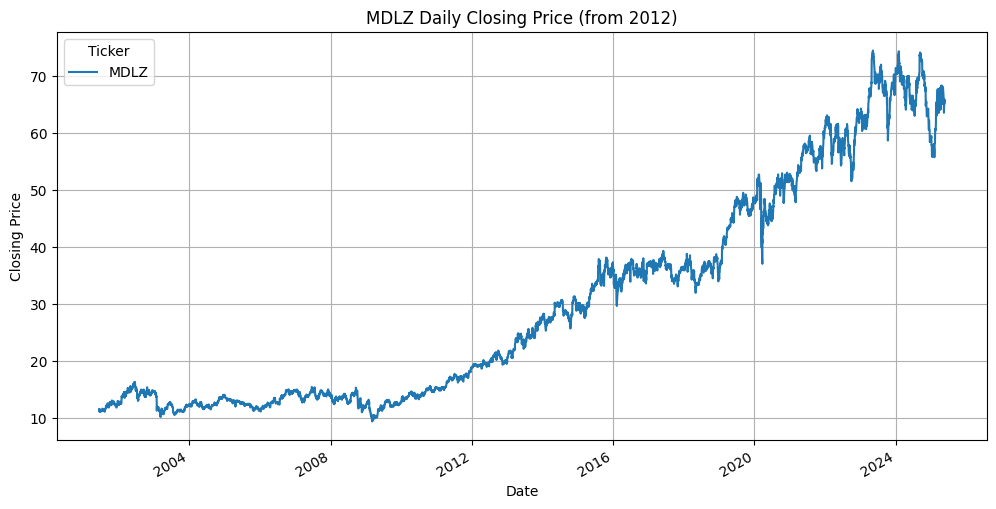

[*********************100%***********************]  1 of 1 completed


Data for ISRG:
Price          Close      High       Low      Open   Volume
Ticker          ISRG      ISRG      ISRG      ISRG     ISRG
Date                                                       
2000-06-16  2.027778  2.055556  2.000000  2.013889   521550
2000-06-19  2.000000  2.055556  2.000000  2.027778  1363050
2000-06-20  2.083333  2.180556  1.750000  2.006944  1177650
2000-06-21  2.444444  2.472222  2.138889  2.222222  2342250
2000-06-22  2.194444  2.472222  2.118056  2.458333   857700


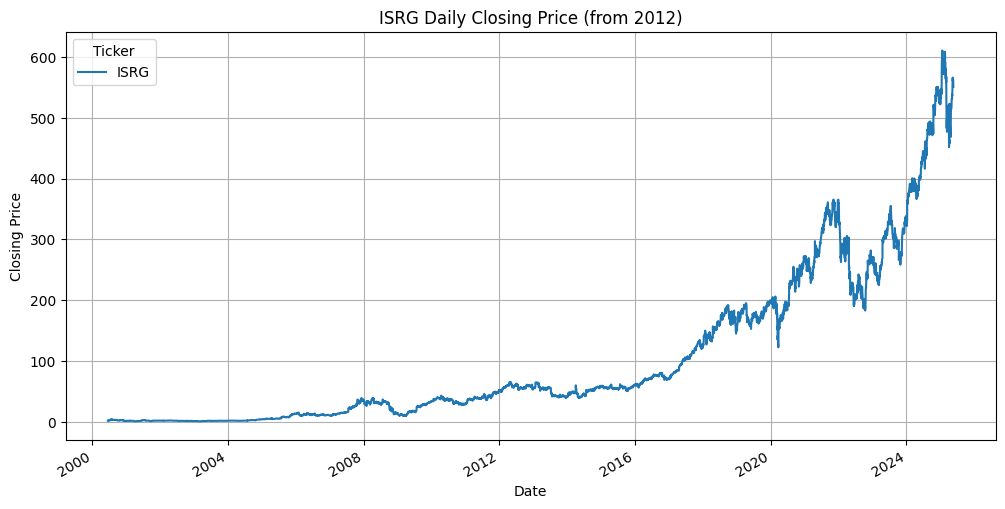

[*********************100%***********************]  1 of 1 completed


Data for BKNG:
Price            Close        High         Low        Open   Volume
Ticker            BKNG        BKNG        BKNG        BKNG     BKNG
Date                                                               
1999-03-31  491.872284  511.903282  433.263068  446.617066  1322933
1999-04-01  477.776428  546.030204  470.357540  544.546426   483233
1999-04-05  445.875183  498.549290  430.295518  495.581734   324917
1999-04-06  468.873718  478.889217  415.457725  447.358943   353900
1999-04-07  442.165741  482.227738  437.714408  475.550738   156617


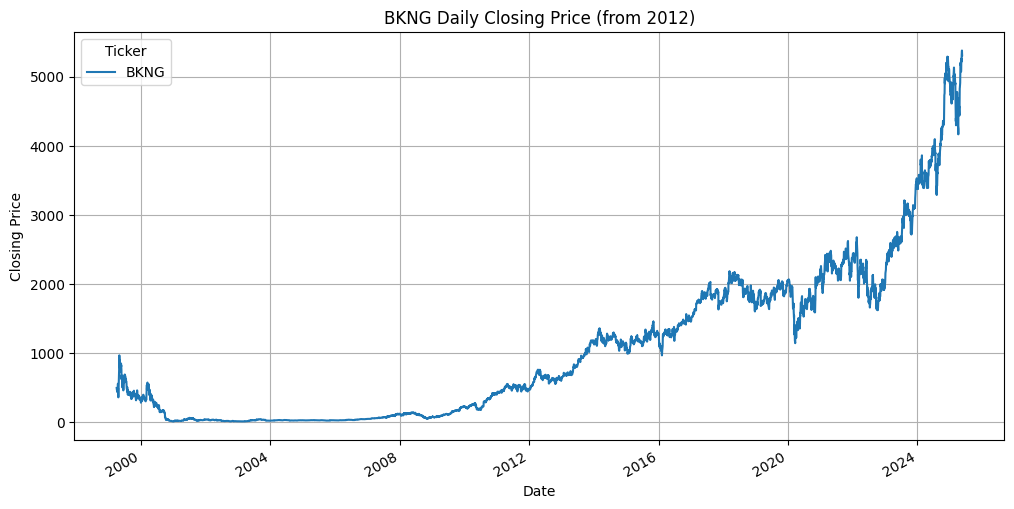

[*********************100%***********************]  1 of 1 completed


Data for GILD:
Price          Close      High       Low      Open   Volume
Ticker          GILD      GILD      GILD      GILD     GILD
Date                                                       
1996-06-03  0.756292  0.775684  0.747981  0.770144  5644800
1996-06-04  0.759062  0.781225  0.747981  0.753521  4844800
1996-06-05  0.745210  0.770144  0.731359  0.759062  4803200
1996-06-06  0.725819  0.753521  0.687034  0.753521  9353600
1996-06-07  0.698115  0.731359  0.681494  0.698115  8016000


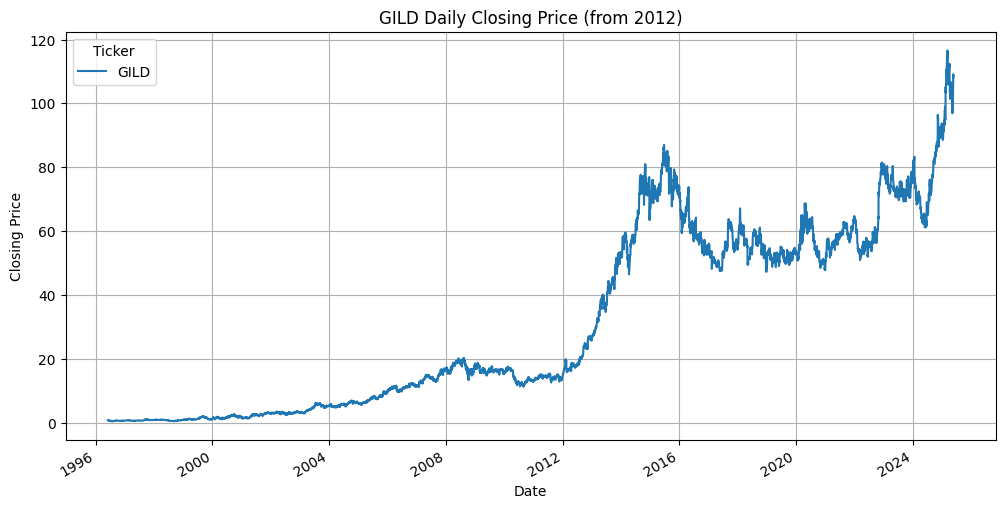

QQQ columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
AAPL columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
MSFT columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
AMZN columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
GOOG columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
GOOGL columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
NVDA columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
META columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
TSLA columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
AVGO columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
COST columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
PEP columns: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
CMCSA columns: Index(['Open', 'High', 'Lo

In [ ]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Define the symbols to fetch data for
# Replace with the actual ticker for Nasdaq composite and the top 25 Nasdaq tickers
symbols = ['QQQ', 'AAPL', 'MSFT', 'AMZN', 'GOOG', 'GOOGL', 'NVDA', 'META', 'TSLA', 'AVGO', 'COST', 'PEP', 'CMCSA', 'ADBE', 'CSCO', 'INTC', 'NFLX', 'AMGN', 'PYPL', 'QCOM', 'TXN', 'SBUX', 'MDLZ', 'ISRG', 'BKNG', 'GILD']

# Fetch data from Yahoo Finance
all_data = {}
for symbol in symbols:
    # Download data
    data = yf.download(symbol, start='1996-06-01')
    all_data[symbol] = data

    # Print the first few rows of the dataset
    print(f"Data for {symbol}:")
    print(data.head())

    # Plot the data
    data['Close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2012)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

# Adjust column names based on the number of columns
for symbol, df in all_data.items():
    if len(df.columns) == 6:
        df.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    else:
        df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Verify the column names
for symbol, df in all_data.items():
    print(f"{symbol} columns: {df.columns}")

In [ ]:
all_data['QQQ'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['AAPL'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['MSFT'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['AMZN'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['GOOG'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['GOOGL'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['NVDA'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['META'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['TSLA'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['AVGO'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['COST'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['PEP'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['CMCSA'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['ADBE'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['CSCO'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['INTC'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['NFLX'].columns = ['open', 'high', 'low', 'close', 'volume']
all_data['AMGN'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['PYPL'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['QCOM'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['TXN'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['SBUX'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['MDLZ'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['ISRG'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['BKNG'].columns = ['open', 'high', 'low', 'close',  'volume']
all_data['GILD'].columns = ['open', 'high', 'low', 'close', 'volume']

<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.20162780e+08 2.14892510e+08 1.74032111e+08 ... 2.59730566e+10
 2.51564803e+10 2.19733336e+10]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.75359766e+08 2.73362558e+08 2.17931242e+08 ... 1.57680244e+10
 2.71613907e+10 2.58367521e+10]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for QQQ:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
1999-03-10  43.282837  43.362304  42.620615  43.335815  5232000      NaN   
1999-03-11  43.494747  43.852347  42.647103  43.600703  9688600      NaN   
1999-03-12  42.435200  43.362311  42.090844  43.335822  8743600      NaN   
1999-03-15  43.653656  43.706634  42.302724  42.753034  6369000      NaN   
1999-03-16  44.024506  44.209928  43.362284  43.839084  4905800      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
1999-03-10     NaN     NaN     NaN      NaN  ...       0        0       1   
1999-03-11     NaN     NaN     NaN      NaN  ...       0        0       1   
1999-03-12     NaN     NaN     NaN      NaN  ...       0        0       1   
1999-03-15     NaN     NaN     NaN      NaN  ...       0        0  

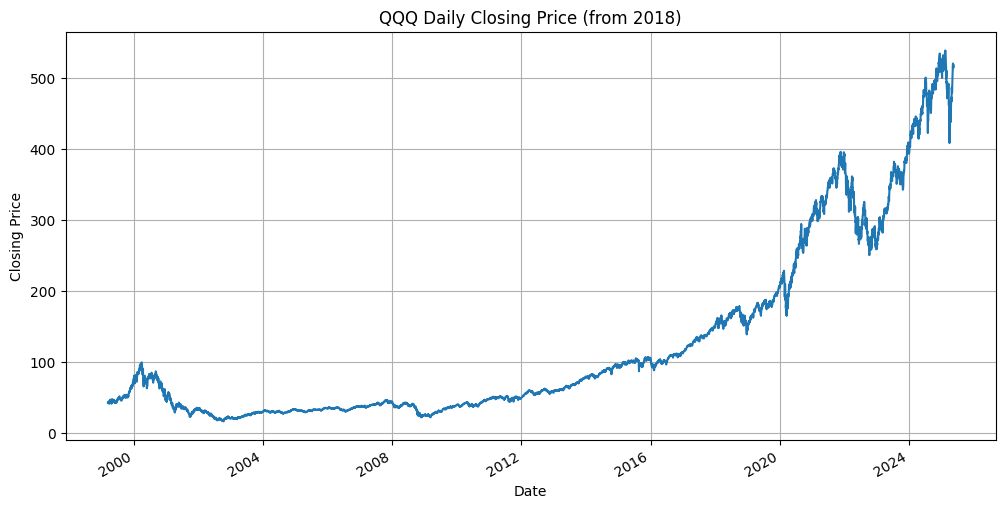

Number of technical indicators successfully added to QQQ: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[9.59771262e+07 1.94136404e+07 2.77749044e+07 ... 1.09499205e+10
 1.04726894e+10 1.15807153e+10]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.37928156e+08 6.74487808e+07 4.82017513e+07 ... 9.56108051e+09
 8.78825102e+09 7.82675024e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for AAPL:
                open      high       low     close     volume  SMA_100  \
Date                                                                     
1996-06-03  0.185960  0.195352  0.185960  0.194413  125462400      NaN   
1996-06-04  0.181734  0.183143  0.179386  0.180325  762238400      NaN   
1996-06-05  0.188778  0.191596  0.182204  0.190657  510104000      NaN   
1996-06-06  0.182204  0.189717  0.181264  0.187838  362096000      NaN   
1996-06-07  0.183143  0.183143  0.176568  0.180325  267769600      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
1996-06-03     NaN     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN     NaN      NaN  ...       0        0       1   
199

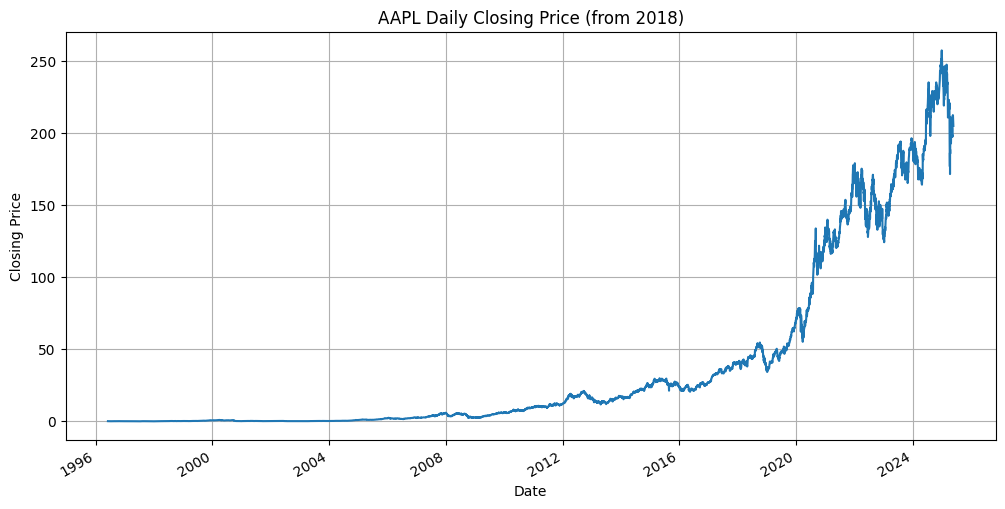

Number of technical indicators successfully added to AAPL: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.32456103e+08 4.10273965e+08 2.11963028e+08 ... 9.95070925e+09
 9.68157904e+09 7.03823239e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.97504703e+08 3.19602150e+08 2.66224820e+08 ... 6.71305872e+09
 1.07732725e+10 4.95184066e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for MSFT:
                open      high       low     close    volume  SMA_100  EMA_50  \
Date                                                                            
1996-06-03  4.535283  4.578385  4.525705  4.549650  31684800      NaN     NaN   
1996-06-04  4.516127  4.554439  4.453868  4.544861  65852800      NaN     NaN   
1996-06-05  4.631065  4.645432  4.516126  4.520915  50968000      NaN     NaN   
1996-06-06  4.590357  4.712479  4.587963  4.664588  88136000      NaN     NaN   
1996-06-07  4.645430  4.645430  4.506546  4.506546  70198400      NaN     NaN   

            WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
1996-06-03     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN      NaN  ...       0        0       1   
19

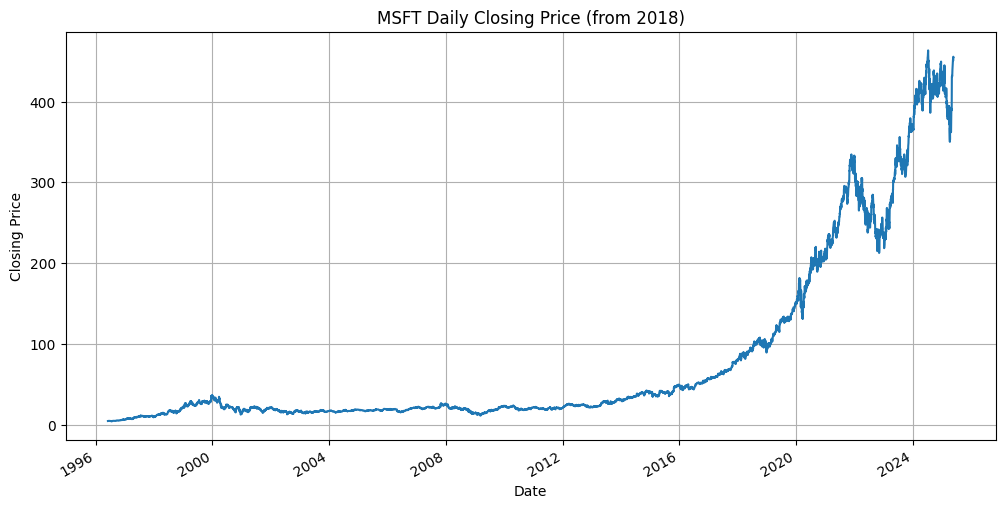

Number of technical indicators successfully added to MSFT: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.26331608e+07 1.33786482e+07 7.30635363e+06 ... 1.19134391e+10
 8.92462187e+09 6.00888387e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.77156745e+07 1.04960828e+07 9.32081049e+06 ... 1.32126456e+10
 6.97196649e+09 5.96247413e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for AMZN:
                open      high       low     close      volume  SMA_100  \
Date                                                                      
1997-05-15  0.097917  0.125000  0.096354  0.121875  1443120000      NaN   
1997-05-16  0.086458  0.098958  0.085417  0.098438   294000000      NaN   
1997-05-19  0.085417  0.088542  0.081250  0.088021   122136000      NaN   
1997-05-20  0.081771  0.087500  0.081771  0.086458   109344000      NaN   
1997-05-21  0.071354  0.082292  0.068750  0.081771   377064000      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
1997-05-15     NaN     NaN     NaN      NaN  ...       0        0       1   
1997-05-16     NaN     NaN     NaN      NaN  ...       0        0       1   
1997-05-19     NaN     NaN     NaN      NaN  ...       0        0       1   
1997-05-20     NaN     NaN     NaN      NaN  ...       0        0       1

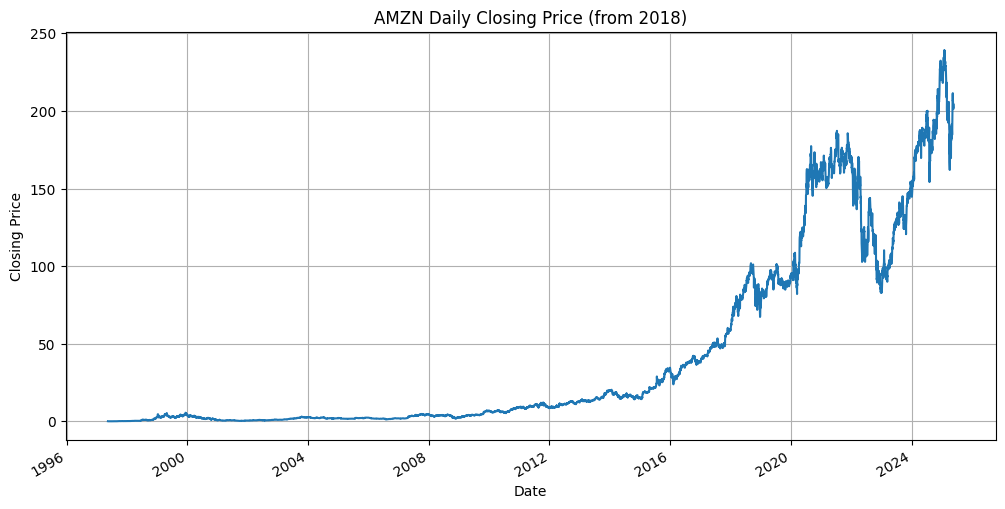

Number of technical indicators successfully added to AMZN: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.17762526e+09 1.01029684e+09 3.74113147e+08 ... 6.12418388e+09
 5.59883801e+09 6.12607844e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[8.26396563e+08 4.83415504e+08 2.69901862e+08 ... 5.98115648e+09
 3.55118015e+09 3.55589500e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for GOOG:
                open      high       low     close     volume  SMA_100  \
Date                                                                     
2004-08-19  2.487352  2.579567  2.378775  2.478923  897427216      NaN   
2004-08-20  2.684922  2.704009  2.491318  2.503960  458857488      NaN   
2004-08-23  2.711942  2.813082  2.703266  2.745407  366857939      NaN   
2004-08-24  2.599647  2.766478  2.567420  2.757554  306396159      NaN   
2004-08-25  2.627658  2.677238  2.575105  2.601877  184645512      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2004-08-19     NaN     NaN     NaN      NaN  ...       0        0       1   
2004-08-20     NaN     NaN     NaN      NaN  ...       0        0       1   
2004-08-23     NaN     NaN     NaN      NaN  ...       0        0       1   
2004-08-24     NaN     NaN     NaN      NaN  ...       0        0       1   
200

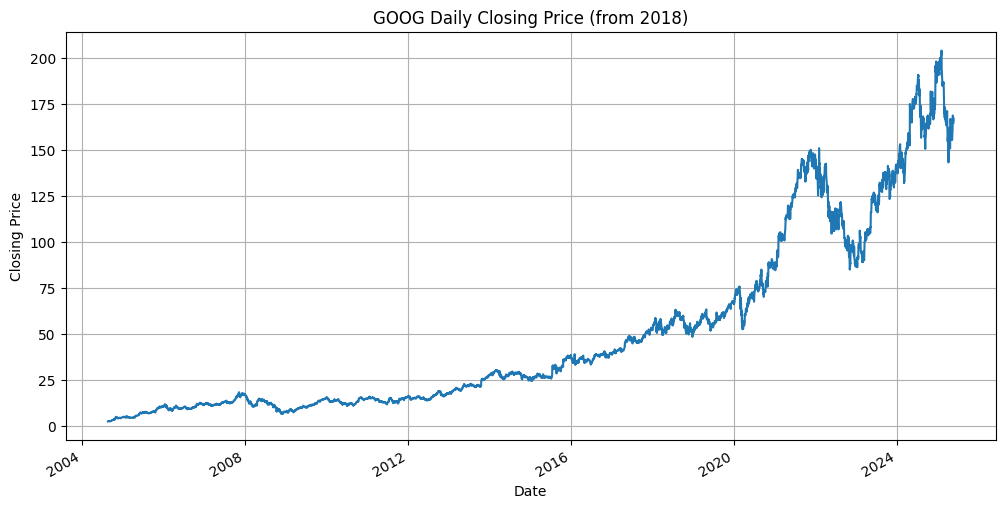

Number of technical indicators successfully added to GOOG: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.17757302e+09 1.01025204e+09 3.74096594e+08 ... 7.17971217e+09
 7.72144266e+09 9.64096845e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[8.26360178e+08 4.83394140e+08 2.69889956e+08 ... 8.88987375e+09
 4.98876536e+09 5.02405900e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for GOOGL:
                open      high       low     close     volume  SMA_100  \
Date                                                                     
2004-08-19  2.499063  2.591713  2.389974  2.490595  893181924      NaN   
2004-08-20  2.697563  2.716741  2.503048  2.515750  456686856      NaN   
2004-08-23  2.724711  2.826327  2.715994  2.758334  365122512      NaN   
2004-08-24  2.611887  2.779504  2.579510  2.770538  304946748      NaN   
2004-08-25  2.640031  2.689843  2.587231  2.614129  183772044      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2004-08-19     NaN     NaN     NaN      NaN  ...       0        0       1   
2004-08-20     NaN     NaN     NaN      NaN  ...       0        0       1   
2004-08-23     NaN     NaN     NaN      NaN  ...       0        0       1   
2004-08-24     NaN     NaN     NaN      NaN  ...       0        0       1   
20

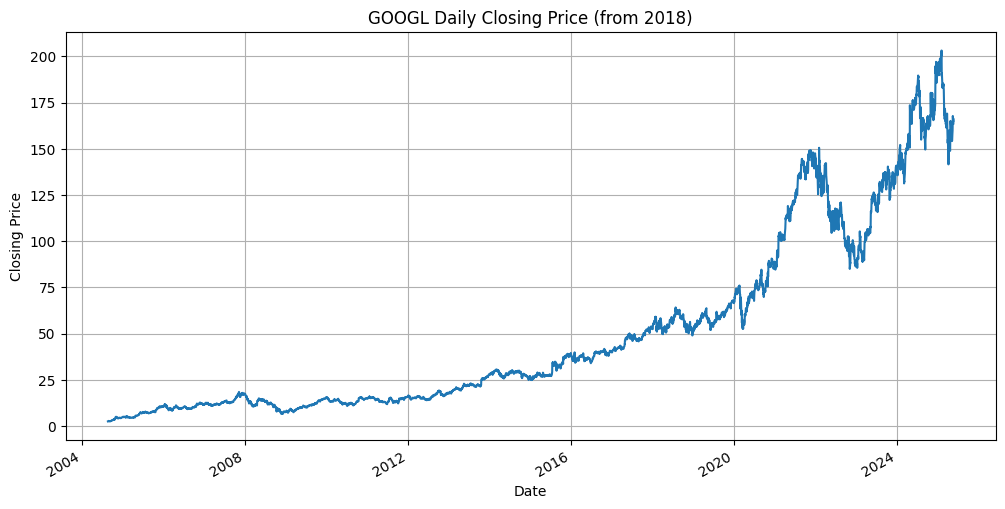

Number of technical indicators successfully added to GOOGL: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.40283002e+07 8.68412496e+06 6.54543591e+06 ... 3.06610182e+10
 2.15169861e+10 2.57884442e+10]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.04595496e+07 9.29798658e+06 9.15891862e+06 ... 1.78098228e+10
 1.55484394e+10 2.57957964e+10]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for NVDA:
                open      high       low     close      volume  SMA_100  \
Date                                                                      
1999-01-22  0.037612  0.044775  0.035581  0.040119  2714688000      NaN   
1999-01-25  0.041552  0.042029  0.037612  0.040597   510480000      NaN   
1999-01-26  0.038328  0.042865  0.037731  0.042029   343200000      NaN   
1999-01-27  0.038209  0.039403  0.036298  0.038447   244368000      NaN   
1999-01-28  0.038089  0.038447  0.037850  0.038209   227520000      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
1999-01-22     NaN     NaN     NaN      NaN  ...       0        0       1   
1999-01-25     NaN     NaN     NaN      NaN  ...       0        0       1   
1999-01-26     NaN     NaN     NaN      NaN  ...       0        0       1   
1999-01-27     NaN     NaN     NaN      NaN  ...       0        0       1

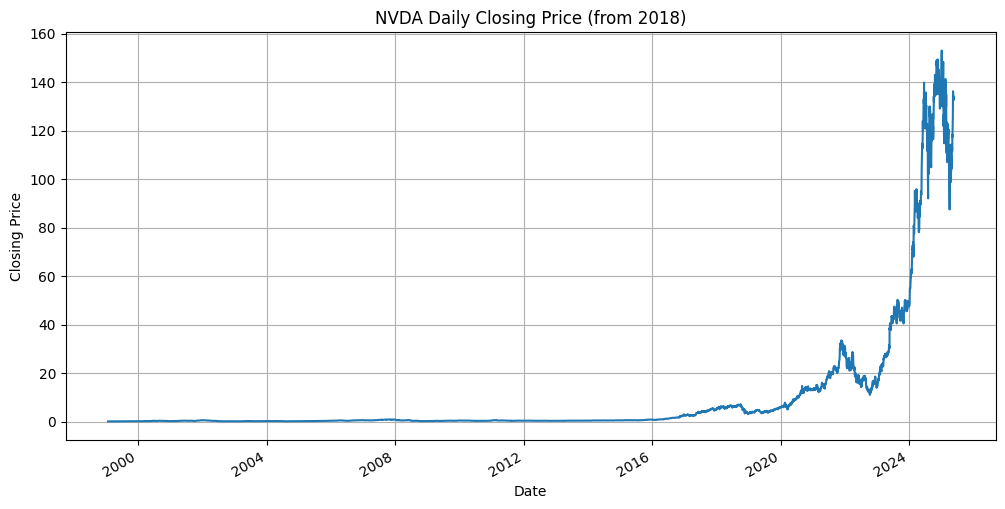

Number of technical indicators successfully added to NVDA: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.63221696e+09 1.18631400e+09 6.98653840e+08 ... 8.14236193e+09
 4.27713838e+09 4.45843535e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[5.92553403e+09 3.28038942e+09 2.32535001e+09 ... 9.32298291e+09
 1.17567875e+10 6.07214903e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for META:
                 open       high        low      close     volume  SMA_100  \
Date                                                                         
2012-05-18  38.050667  44.788910  37.821746  41.852747  573576400      NaN   
2012-05-21  33.870369  36.488033  32.845202  36.358642  168192700      NaN   
2012-05-22  30.854580  33.432430  30.794862  32.457028  101786600      NaN   
2012-05-23  31.849892  32.347546  31.212894  31.222848   73600000      NaN   
2012-05-24  32.875057  33.054213  31.620969  32.795434   50237200      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2012-05-18     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-05-21     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-05-22     NaN     NaN     NaN      NaN  ...       0        0       1   
2012-05-23     NaN     NaN     NaN      NaN  ...    

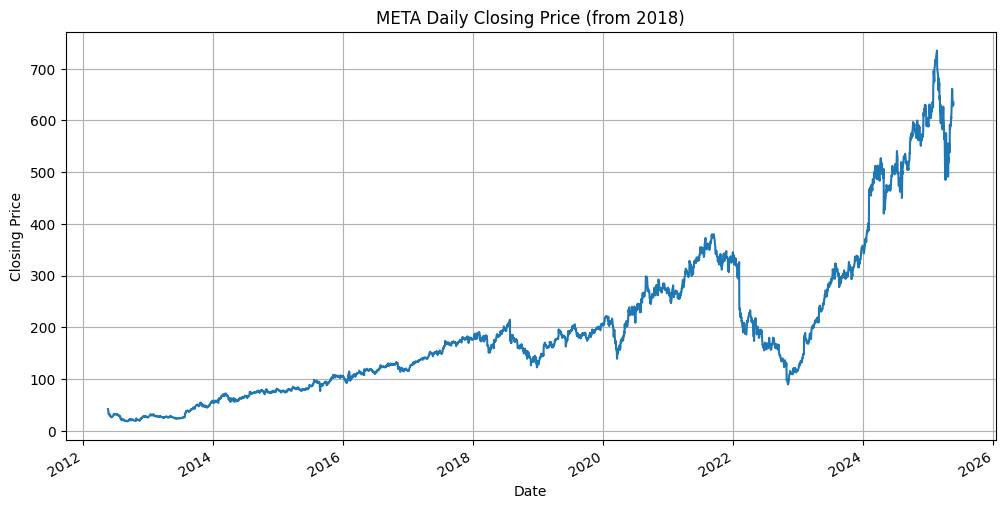

Number of technical indicators successfully added to META: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.55515401e+08 1.26544072e+08 7.02508941e+07 ... 4.70129068e+10
 3.32499152e+10 4.55857560e+10]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.95032126e+08 1.11036794e+08 1.27792976e+08 ... 3.33192374e+10
 2.99986267e+10 2.65590710e+10]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for TSLA:
                open      high       low     close     volume  SMA_100  \
Date                                                                     
2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500      NaN   
2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500      NaN   
2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000      NaN   
2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000      NaN   
2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2010-06-29     NaN     NaN     NaN      NaN  ...       0        0       1   
2010-06-30     NaN     NaN     NaN      NaN  ...       0        0       1   
2010-07-01     NaN     NaN     NaN      NaN  ...       0        0       1   
2010-07-02     NaN     NaN     NaN      NaN  ...       0        0       1   
201

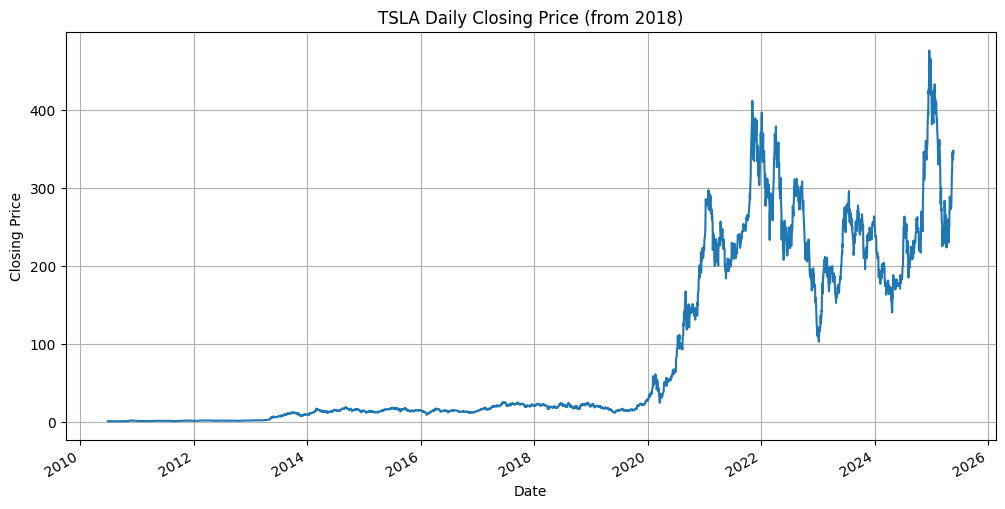

Number of technical indicators successfully added to TSLA: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.64589668e+07 1.32417518e+07 7.49534151e+06 ... 4.34171176e+09
 2.68506968e+09 2.41077629e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.83730221e+07 2.79480126e+07 2.58565575e+07 ... 3.23864283e+09
 5.32215062e+09 3.45345201e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for AVGO:
                open      high       low     close     volume  SMA_100  \
Date                                                                     
2009-08-06  1.146604  1.198336  1.102668  1.169281  241978000      NaN   
2009-08-07  1.164321  1.187707  1.135975  1.144479   24543000      NaN   
2009-08-10  1.131723  1.178494  1.106211  1.178494   24210000      NaN   
2009-08-11  1.110463  1.133848  1.098415  1.132431   23054000      NaN   
2009-08-12  1.133848  1.148021  1.109754  1.144478   14513000      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2009-08-06     NaN     NaN     NaN      NaN  ...       0        0       1   
2009-08-07     NaN     NaN     NaN      NaN  ...       0        0       1   
2009-08-10     NaN     NaN     NaN      NaN  ...       0        0       1   
2009-08-11     NaN     NaN     NaN      NaN  ...       0        0       1   
200

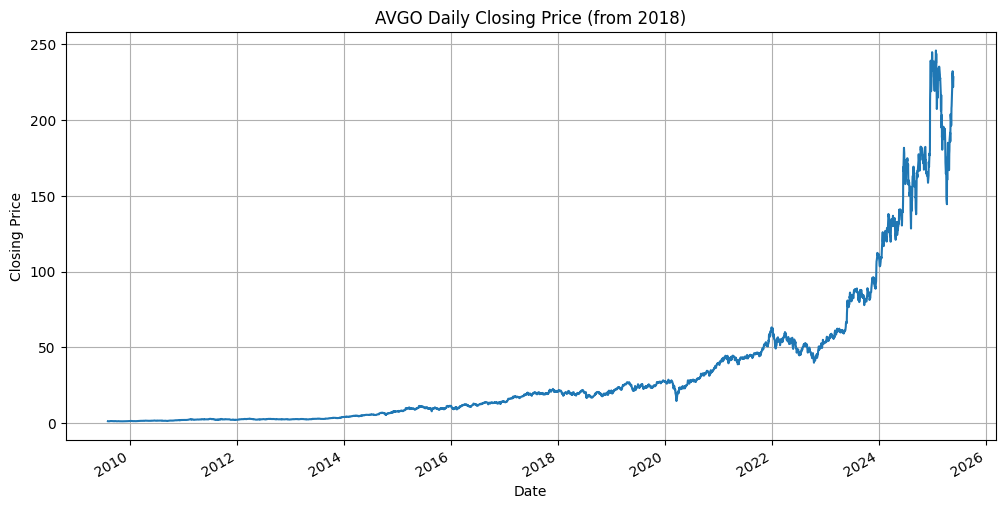

Number of technical indicators successfully added to AVGO: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[9.78900213e+06 3.59322231e+07 3.27226668e+07 ... 2.06742552e+09
 1.92145636e+09 2.34478809e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.58615737e+07 1.18469333e+07 1.05545808e+07 ... 1.18194416e+09
 2.20698171e+09 7.51024130e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for COST:
                open      high       low     close   volume  SMA_100  EMA_50  \
Date                                                                           
1996-06-03  6.825122  6.866994  6.573891  6.699507  2223800      NaN     NaN   
1996-06-04  6.783247  6.908863  6.699504  6.825119  1437200      NaN     NaN   
1996-06-05  7.013546  7.034482  6.825122  6.908866  5190400      NaN     NaN   
1996-06-06  6.950738  7.118226  6.950738  6.992610  4661000      NaN     NaN   
1996-06-07  6.908866  6.992610  6.783251  6.992610  2291200      NaN     NaN   

            WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
1996-06-03     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN      NaN  ...       0        0       1   
1996-06-0

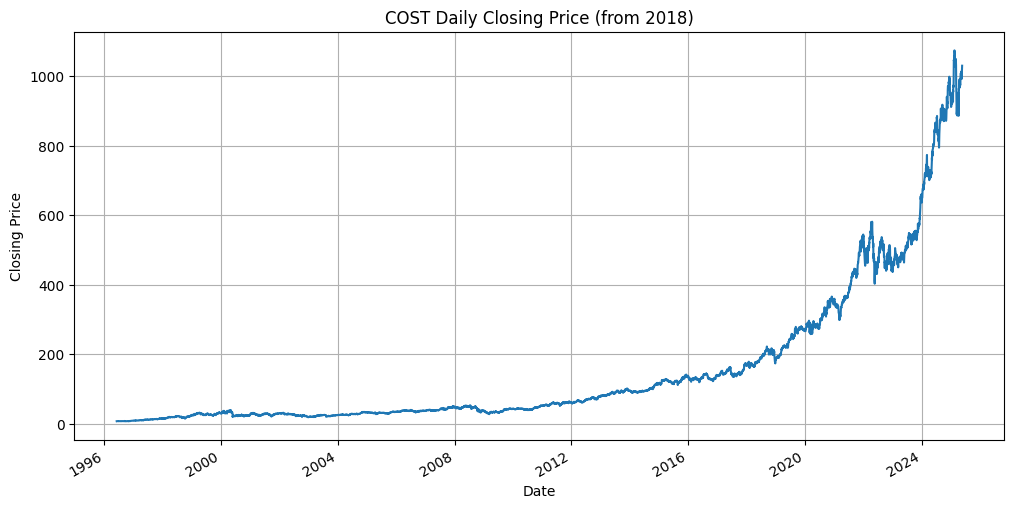

Number of technical indicators successfully added to COST: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.55445425e+07 3.60750409e+07 4.55664565e+07 ... 1.19008824e+09
 1.17135929e+09 1.24005070e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[5.20690387e+07 3.69774520e+07 3.64375438e+07 ... 1.35359834e+09
 1.00293176e+09 6.81892954e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for PEP:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
1996-06-03  15.509927  15.625673  15.220562  15.278435  2515000      NaN   
1996-06-04  15.452053  15.625672  15.278434  15.509926  2943800      NaN   
1996-06-05  15.621622  15.621622  15.389330  15.505476  2326600      NaN   
1996-06-06  15.737768  15.970060  15.621622  15.679695  2891800      NaN   
1996-06-07  15.679695  15.679695  15.215112  15.331257  3379200      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
1996-06-03     NaN     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN     NaN      NaN  ...       0        0  

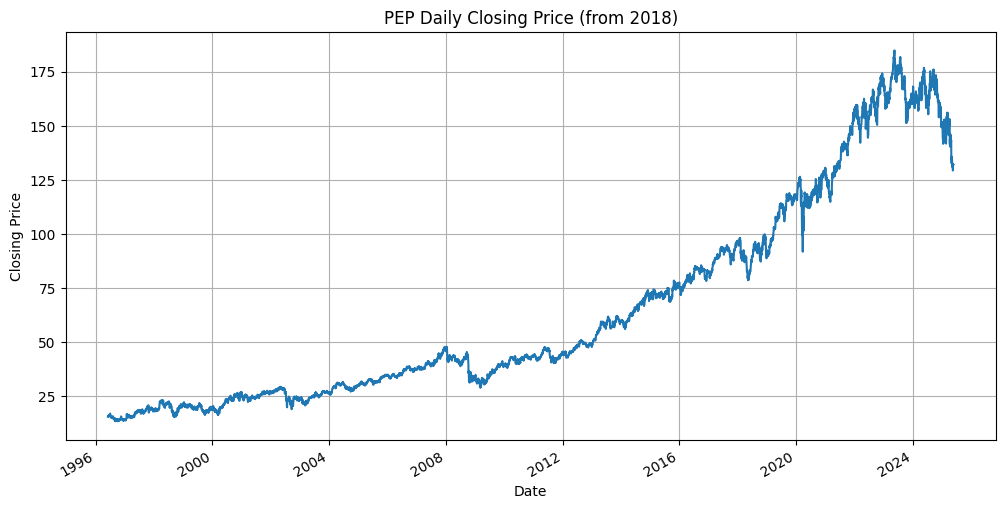

Number of technical indicators successfully added to PEP: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[8.73832443e+05 2.41322443e+06 1.83970084e+06 ... 6.32485340e+08
 7.35884031e+08 4.99460885e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[9.85717608e+05 3.62363048e+06 9.41318199e+06 ... 6.28389531e+08
 5.01682295e+08 3.46469434e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for CMCSA:
                open      high       low     close   volume  SMA_100  EMA_50  \
Date                                                                           
1996-06-03  1.991348  2.034639  1.991348  2.020209  1144200      NaN     NaN   
1996-06-04  2.012994  2.020209  1.976919  1.976919   495000      NaN     NaN   
1996-06-05  2.037209  2.051657  2.008312  2.008312   432000      NaN     NaN   
1996-06-06  2.044432  2.066105  2.022760  2.051656  1179000      NaN     NaN   
1996-06-07  2.029984  2.037209  1.993864  2.008312  1800000      NaN     NaN   

            WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
1996-06-03     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN      NaN  ...       0        0       1   
1996-06-

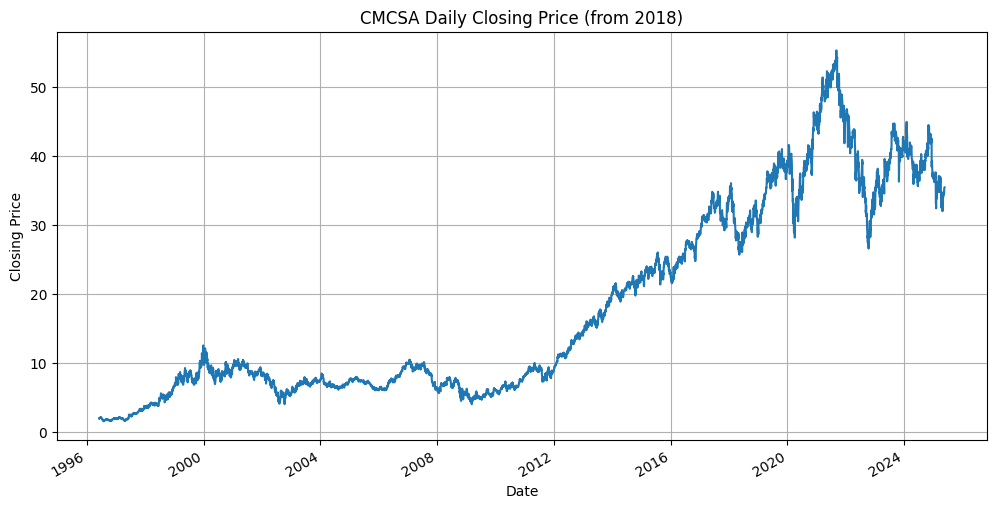

Number of technical indicators successfully added to CMCSA: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.37469551e+07 4.82129324e+07 4.27186334e+07 ... 2.24367269e+09
 1.02313813e+09 6.39459037e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.86317750e+07 4.67871366e+07 4.99047486e+07 ... 1.12679652e+09
 7.83594267e+08 1.25132800e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for ADBE:
                open      high       low     close    volume  SMA_100  EMA_50  \
Date                                                                            
1996-06-03  4.416188  4.568998  4.400907  4.523155   8892000      NaN     NaN   
1996-06-04  4.385626  4.492593  4.339784  4.462031   8717600      NaN     NaN   
1996-06-05  4.492593  4.553717  4.347424  4.385626  10564000      NaN     NaN   
1996-06-06  4.286303  4.523157  4.263381  4.492595  11274400      NaN     NaN   
1996-06-07  4.324502  4.355064  4.095288  4.186974  14816800      NaN     NaN   

            WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
1996-06-03     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN      NaN  ...       0        0       1   
19

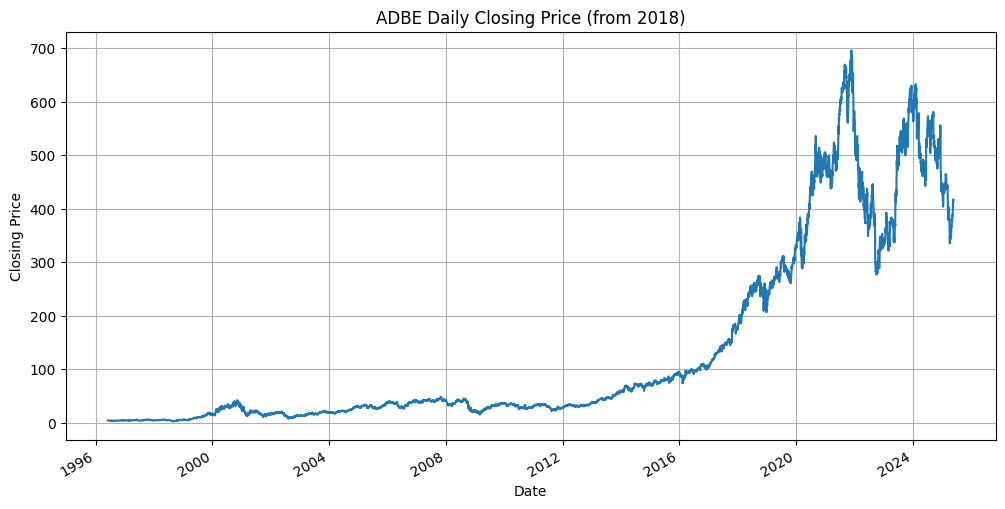

Number of technical indicators successfully added to ADBE: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.56908242e+08 1.74652727e+08 2.17322509e+08 ... 1.45818198e+09
 1.14974179e+09 3.88068973e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.91538474e+08 1.34474931e+08 1.85976409e+08 ... 1.03311141e+09
 9.52829705e+08 5.18517169e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for CSCO:
                open      high       low     close    volume  SMA_100  EMA_50  \
Date                                                                            
1996-06-03  4.078282  4.086283  3.967410  4.005129  46866600      NaN     NaN   
1996-06-04  4.078282  4.096570  4.041705  4.078282  38531700      NaN     NaN   
1996-06-05  4.178866  4.178866  4.023416  4.087425  42633900      NaN     NaN   
1996-06-06  4.069136  4.215442  4.069136  4.206298  52195500      NaN     NaN   
1996-06-07  4.087426  4.096570  3.950264  3.968552  47823300      NaN     NaN   

            WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
1996-06-03     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN      NaN  ...       0        0       1   
19

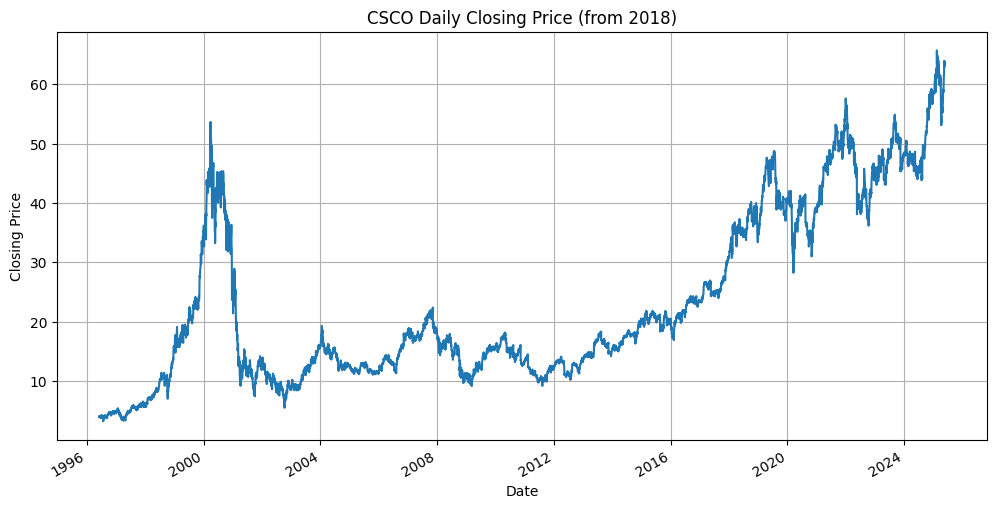

Number of technical indicators successfully added to CSCO: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.05069526e+08 2.78983574e+08 1.92445446e+08 ... 1.73015865e+09
 1.20219845e+09 1.02886124e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.90522505e+08 3.69891393e+08 2.23486286e+08 ... 1.42416241e+09
 1.36678791e+09 8.46220540e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for INTC:
                open      high       low     close    volume  SMA_100  EMA_50  \
Date                                                                            
1996-06-03  5.409341  5.435814  5.276975  5.303448  69614400      NaN     NaN   
1996-06-04  5.387280  5.471111  5.356395  5.435814  56274400      NaN     NaN   
1996-06-05  5.426988  5.435812  5.338744  5.365218  35413600      NaN     NaN   
1996-06-06  5.312274  5.471113  5.303450  5.453464  51574400      NaN     NaN   
1996-06-07  5.312274  5.329923  5.188733  5.207485  70562400      NaN     NaN   

            WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
1996-06-03     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN      NaN  ...       0        0       1   
19

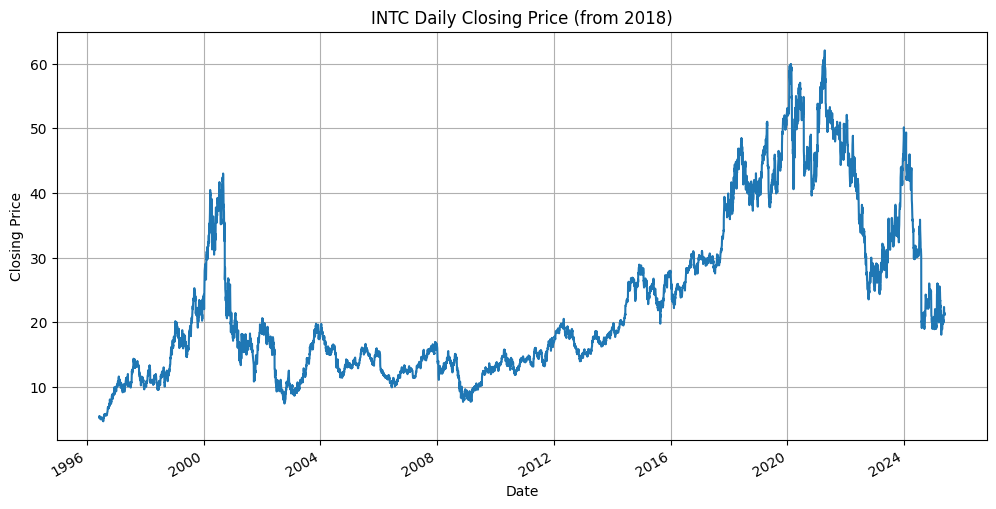

Number of technical indicators successfully added to INTC: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.34606054e+07 3.47254351e+06 3.50517874e+06 ... 5.58957690e+09
 2.52829729e+09 2.51631588e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.93757434e+06 7.69102068e+06 1.11261025e+07 ... 2.93903991e+09
 7.25052338e+09 3.36409196e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for NFLX:
                open      high       low     close     volume  SMA_100  \
Date                                                                     
2002-05-23  1.196429  1.242857  1.145714  1.156429  104790000      NaN   
2002-05-24  1.210000  1.225000  1.197143  1.214286   11104800      NaN   
2002-05-28  1.157143  1.232143  1.157143  1.213571    6609400      NaN   
2002-05-29  1.103571  1.164286  1.085714  1.164286    6757800      NaN   
2002-05-30  1.071429  1.107857  1.071429  1.107857   10154200      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2002-05-23     NaN     NaN     NaN      NaN  ...       0        0       1   
2002-05-24     NaN     NaN     NaN      NaN  ...       0        0       1   
2002-05-28     NaN     NaN     NaN      NaN  ...       0        0       1   
2002-05-29     NaN     NaN     NaN      NaN  ...       0        0       1   
200

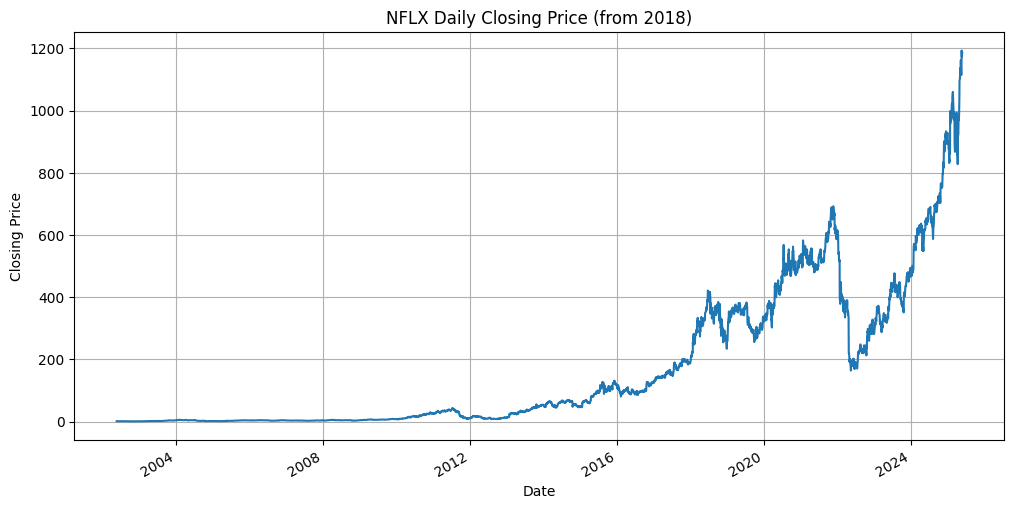

Number of technical indicators successfully added to NFLX: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.26692753e+07 6.71843008e+07 4.04265578e+07 ... 6.99913703e+08
 5.98859274e+08 6.03307013e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.96159194e+07 6.73178259e+07 3.19141101e+07 ... 1.04170470e+09
 1.05753226e+09 3.32793158e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for AMGN:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
1996-06-03  10.210395  10.329246  10.156372  10.286027  4328000      NaN   
1996-06-04  10.286024  10.307633  10.156368  10.221196  4850800      NaN   
1996-06-05  10.437295  10.480514  10.329248  10.350858  4108000      NaN   
1996-06-06  10.458902  10.566949  10.415684  10.480512  6406000      NaN   
1996-06-07  10.307637  10.437293  10.199591  10.415684  6503600      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
1996-06-03     NaN     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN     NaN      NaN  ...       0        0 

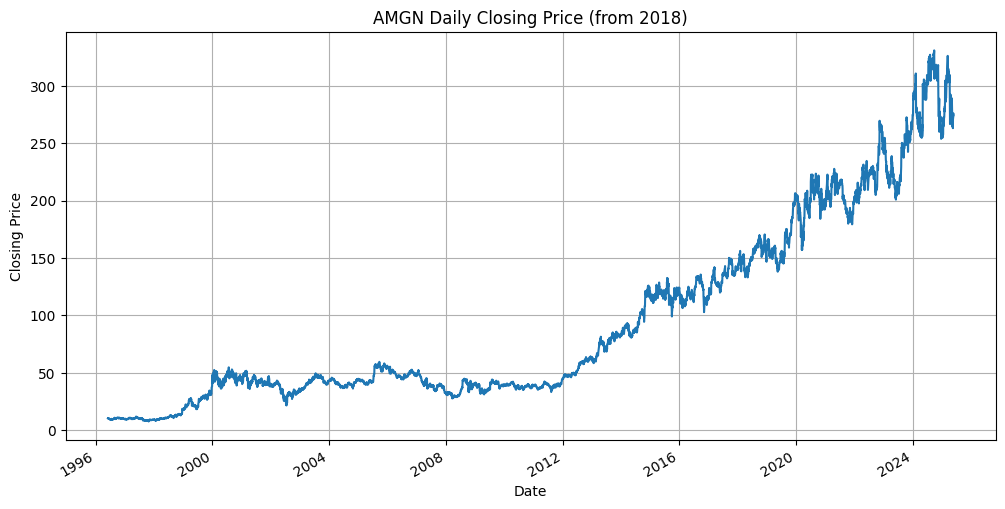

Number of technical indicators successfully added to AMGN: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.76035780e+08 1.72683966e+08 4.93323892e+08 ... 5.32363636e+08
 6.05818143e+08 3.57329006e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.73583096e+08 1.92574356e+08 1.31114688e+08 ... 5.84043876e+08
 5.85605467e+08 6.24114473e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for PYPL:
                 open       high        low      close   volume  SMA_100  \
Date                                                                       
2015-07-06  36.709999  39.750000  36.000000  38.000000  5866600      NaN   
2015-07-07  36.619999  37.810001  36.000000  37.720001  7359000      NaN   
2015-07-08  34.700001  36.360001  34.529999  36.340000  5387700      NaN   
2015-07-09  34.500000  35.520000  33.990002  35.099998  3760100      NaN   
2015-07-10  34.689999  35.189999  33.980000  34.660000  4472800      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2015-07-06     NaN     NaN     NaN      NaN  ...       0        0       1   
2015-07-07     NaN     NaN     NaN      NaN  ...       0        0       1   
2015-07-08     NaN     NaN     NaN      NaN  ...       0        0       1   
2015-07-09     NaN     NaN     NaN      NaN  ...       0        0 

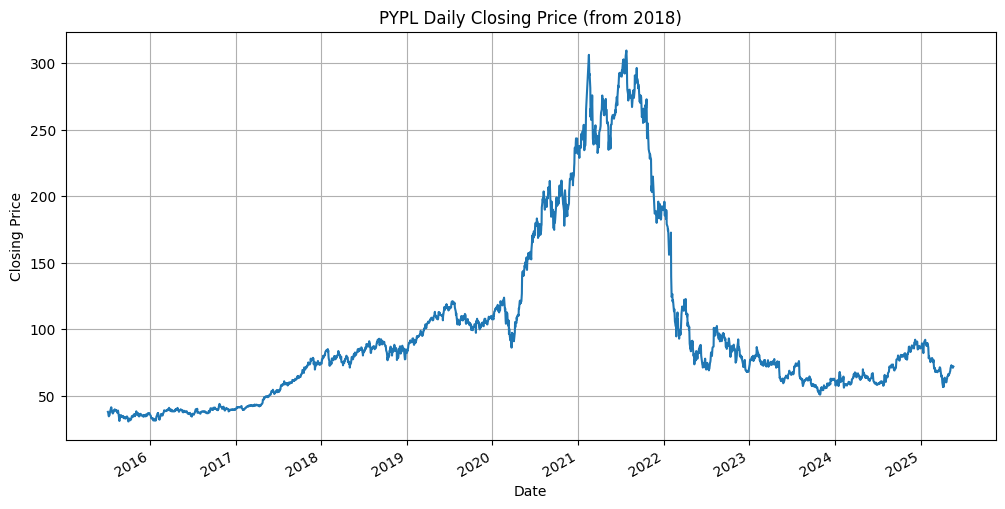

Number of technical indicators successfully added to PYPL: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.09288411e+07 4.42086766e+07 3.31367439e+07 ... 1.01626987e+09
 8.05773430e+08 8.09178897e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.81473675e+07 4.14091919e+07 3.29016872e+07 ... 1.05876259e+09
 1.05339651e+09 1.09697840e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for QCOM:
                open      high       low     close    volume  SMA_100  EMA_50  \
Date                                                                            
1996-06-03  1.992739  2.055313  1.992739  2.050499  27022400      NaN     NaN   
1996-06-04  2.031245  2.050499  1.992738  1.992738  18960000      NaN     NaN   
1996-06-05  2.007179  2.026432  1.992738  2.021619  15360000      NaN     NaN   
1996-06-06  1.968672  2.055313  1.968672  2.021619  21937600      NaN     NaN   
1996-06-07  2.007179  2.007179  1.901284  1.925351  21294400      NaN     NaN   

            WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
1996-06-03     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN      NaN  ...       0        0       1   
19

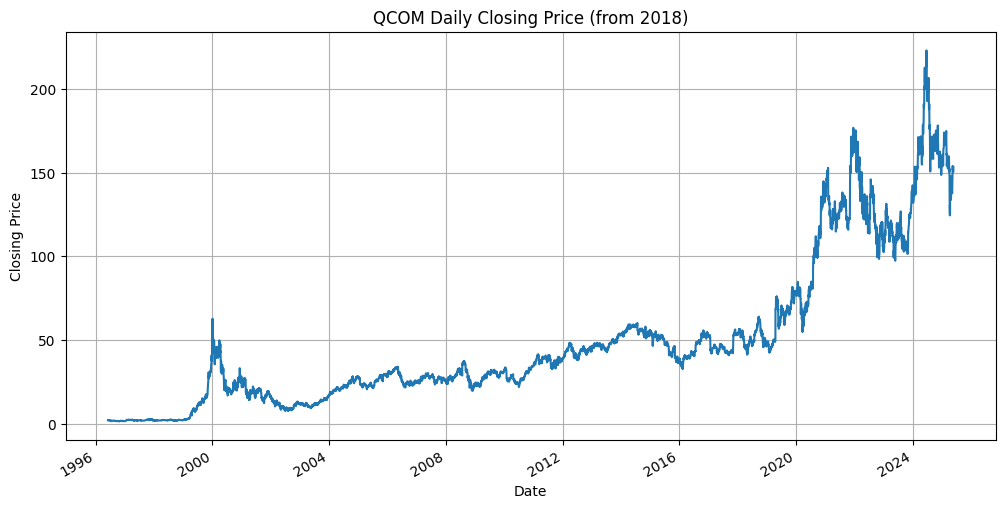

Number of technical indicators successfully added to QCOM: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.42851991e+07 4.39962866e+07 3.79568734e+07 ... 1.03566963e+09
 8.51669503e+08 9.94733944e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.71879340e+07 3.53145002e+07 3.64116152e+07 ... 1.22364202e+09
 1.20114591e+09 8.28949240e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for TXN:
                open      high       low     close    volume  SMA_100  EMA_50  \
Date                                                                            
1996-06-03  4.210504  4.296044  4.200999  4.267531   7408000      NaN     NaN   
1996-06-04  4.143970  4.248520  4.134465  4.248520  11207200      NaN     NaN   
1996-06-05  4.153474  4.172483  4.134465  4.153474   8502400      NaN     NaN   
1996-06-06  4.029917  4.181990  4.029917  4.181990   8813600      NaN     NaN   
1996-06-07  4.124963  4.134467  3.982395  4.001404  13930400      NaN     NaN   

            WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
1996-06-03     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN      NaN  ...       0        0       1   
199

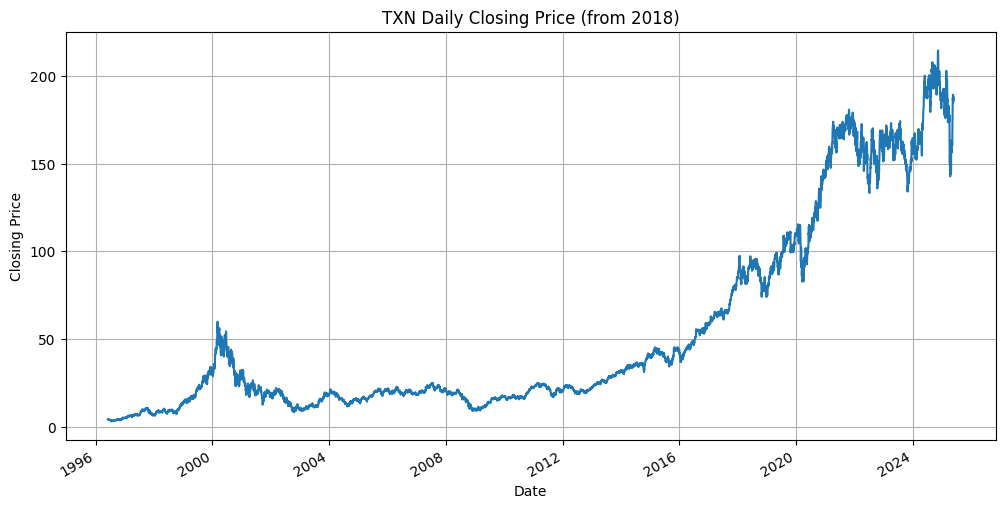

Number of technical indicators successfully added to TXN: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.54342878e+07 1.44085997e+07 1.77042294e+07 ... 1.09688126e+09
 1.18155376e+09 7.91645849e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[7.71509767e+06 1.88512744e+07 9.56404489e+06 ... 1.12658675e+09
 8.09142314e+08 5.34201733e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for SBUX:
                open      high       low     close    volume  SMA_100  EMA_50  \
Date                                                                            
1996-06-03  1.265899  1.283645  1.248153  1.283645   2979200      NaN     NaN   
1996-06-04  1.242237  1.271814  1.230406  1.265899   6142400      NaN     NaN   
1996-06-05  1.295476  1.319137  1.230406  1.230406  12249600      NaN     NaN   
1996-06-06  1.248153  1.325053  1.248153  1.307307  11139200      NaN     NaN   
1996-06-07  1.236321  1.259983  1.206744  1.206744  15395200      NaN     NaN   

            WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
1996-06-03     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN      NaN  ...       0        0       1   
19

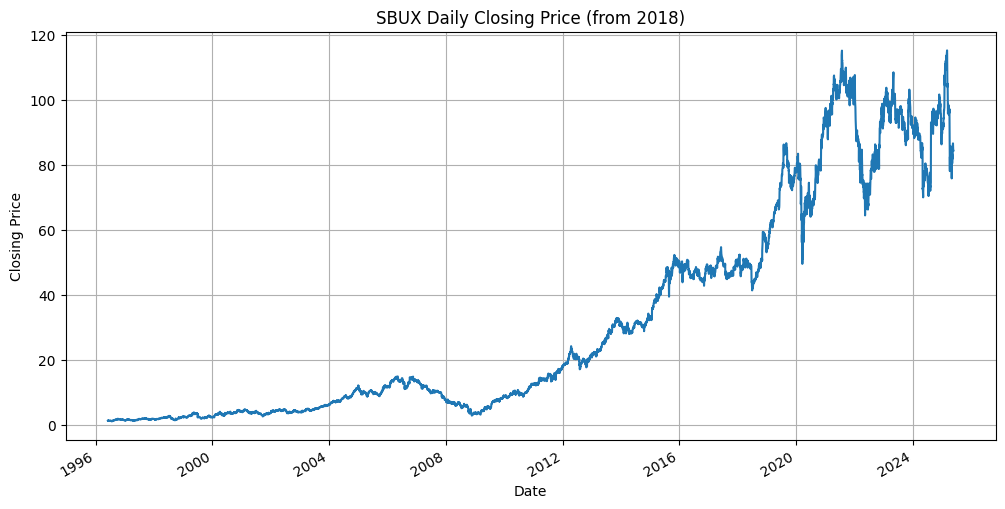

Number of technical indicators successfully added to SBUX: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[4.48130405e+07 6.39952923e+07 2.67675519e+07 ... 5.21148297e+08
 4.15398852e+08 4.11078139e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.59578553e+08 1.60154747e+08 4.24787190e+07 ... 6.70997784e+08
 4.75623287e+08 1.86130183e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for MDLZ:
                 open       high        low      close    volume  SMA_100  \
Date                                                                        
2001-06-13  11.520416  11.796906  11.461432  11.612580  69567200      NaN   
2001-06-14  11.114899  11.428254  10.875274  11.428254  31979800      NaN   
2001-06-15  11.280792  11.336090  11.041168  11.059600  14369300      NaN   
2001-06-18  11.177569  11.280793  11.081719  11.081719   4019800      NaN   
2001-06-19  11.207060  11.321342  11.137016  11.280791   5690300      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
2001-06-13     NaN     NaN     NaN      NaN  ...       0        0       1   
2001-06-14     NaN     NaN     NaN      NaN  ...       0        0       1   
2001-06-15     NaN     NaN     NaN      NaN  ...       0        0       1   
2001-06-18     NaN     NaN     NaN      NaN  ...       0   

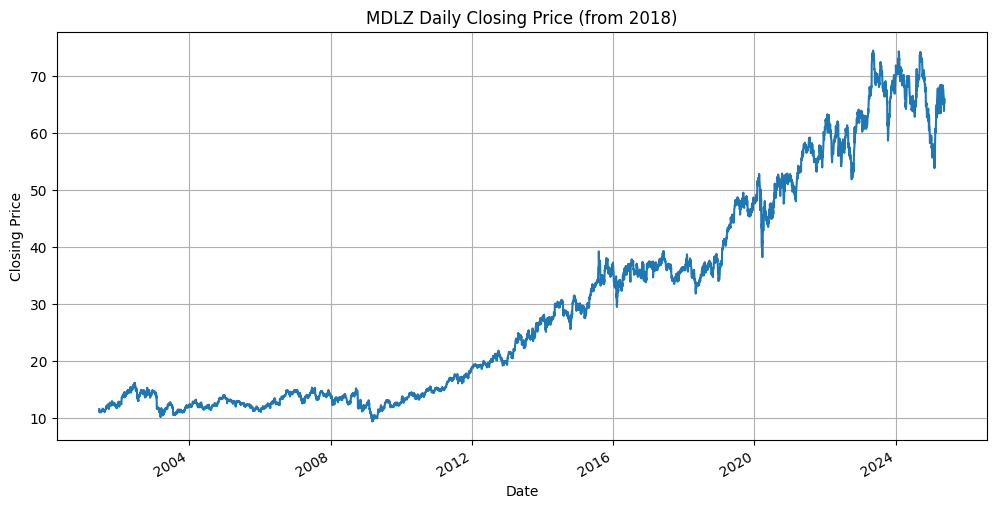

Number of technical indicators successfully added to MDLZ: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.76396279e+06 5.33512494e+06 2.01519793e+06 ... 1.12805768e+09
 8.61628006e+08 7.98313309e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.33076562e+06 1.40402289e+06 1.34333112e+06 ... 7.91110726e+08
 6.86556936e+08 4.29036228e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for ISRG:
                open      high       low     close   volume  SMA_100  EMA_50  \
Date                                                                           
2000-06-16  2.027778  2.055556  2.000000  2.013889   521550      NaN     NaN   
2000-06-19  2.000000  2.055556  2.000000  2.027778  1363050      NaN     NaN   
2000-06-20  2.083333  2.180556  1.750000  2.006944  1177650      NaN     NaN   
2000-06-21  2.444444  2.472222  2.138889  2.222222  2342250      NaN     NaN   
2000-06-22  2.194444  2.472222  2.118056  2.458333   857700      NaN     NaN   

            WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
2000-06-16     NaN     NaN      NaN  ...       0        0       1   
2000-06-19     NaN     NaN      NaN  ...       0        0       1   
2000-06-20     NaN     NaN      NaN  ...       0        0       1   
2000-06-21     NaN     NaN      NaN  ...       0        0       1   
2000-06-2

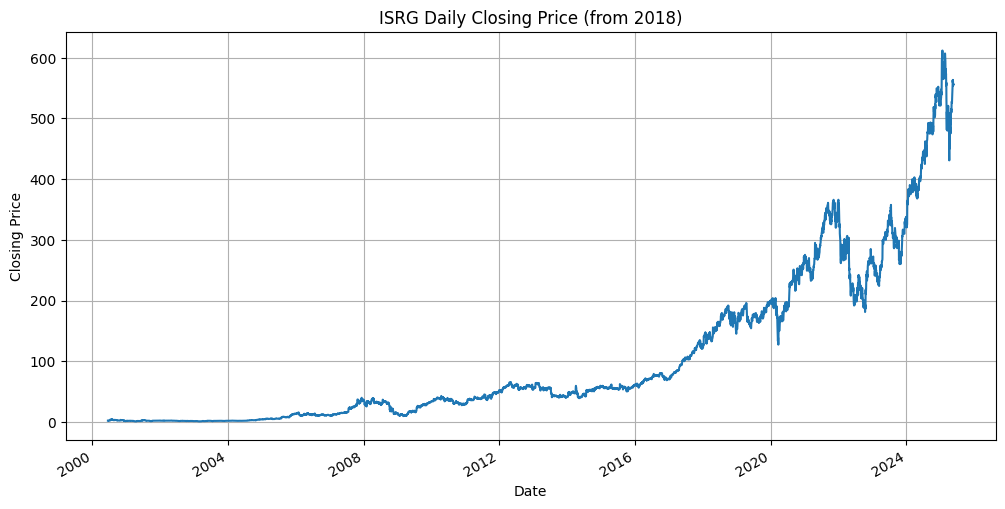

Number of technical indicators successfully added to ISRG: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.51431634e+08 7.28526363e+07 7.89887155e+07 ... 1.05734279e+09
 8.42285966e+08 9.51344772e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.54273466e+08 1.58276571e+08 6.43874044e+07 ... 1.16716511e+09
 8.14742873e+08 3.49058369e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for BKNG:
                  open        high         low       close   volume  SMA_100  \
Date                                                                           
1999-03-31  491.872284  511.903282  433.263068  446.617066  1322933      NaN   
1999-04-01  477.776428  546.030204  470.357540  544.546426   483233      NaN   
1999-04-05  445.875183  498.549290  430.295518  495.581734   324917      NaN   
1999-04-06  468.873718  478.889217  415.457725  447.358943   353900      NaN   
1999-04-07  442.165741  482.227738  437.714408  475.550738   156617      NaN   

            EMA_50  WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                         ...                            
1999-03-31     NaN     NaN     NaN      NaN  ...       0        0       1   
1999-04-01     NaN     NaN     NaN      NaN  ...       0        0       1   
1999-04-05     NaN     NaN     NaN      NaN  ...       0        0       1   
1999-04-06     NaN     NaN     NaN    

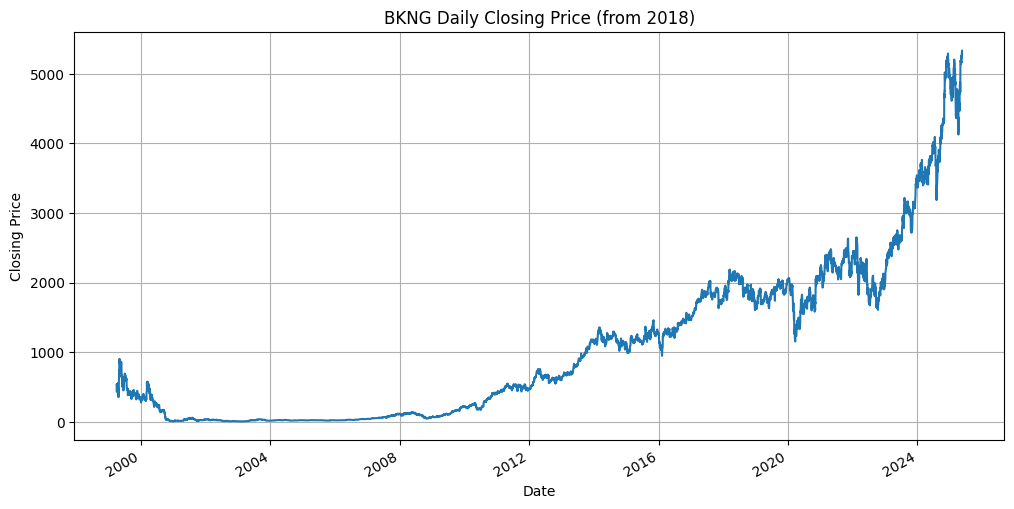

Number of technical indicators successfully added to BKNG: 39


<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.77327039e+07 1.54454822e+07 8.68547750e+06 ... 8.90642432e+08
 1.14534501e+09 4.35970418e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:195: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[3.68645271e+06 3.61931544e+06 6.84083967e+06 ... 1.26044261e+09
 1.00718830e+09 9.61469670e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.ta.mfi(length=28, append=True)
<ipython-input-7-d4661cdee6c9>:232: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce


Data for GILD:
                open      high       low     close   volume  SMA_100  EMA_50  \
Date                                                                           
1996-06-03  0.756292  0.775684  0.747981  0.770144  5644800      NaN     NaN   
1996-06-04  0.759062  0.781225  0.747981  0.753521  4844800      NaN     NaN   
1996-06-05  0.745210  0.770144  0.731359  0.759062  4803200      NaN     NaN   
1996-06-06  0.725819  0.753521  0.687034  0.753521  9353600      NaN     NaN   
1996-06-07  0.698115  0.731359  0.681494  0.698115  8016000      NaN     NaN   

            WMA_50  HMA_50  VWMA_50  ...  SQZ_ON  SQZ_OFF  SQZ_NO  \
Date                                 ...                            
1996-06-03     NaN     NaN      NaN  ...       0        0       1   
1996-06-04     NaN     NaN      NaN  ...       0        0       1   
1996-06-05     NaN     NaN      NaN  ...       0        0       1   
1996-06-06     NaN     NaN      NaN  ...       0        0       1   
1996-06-0

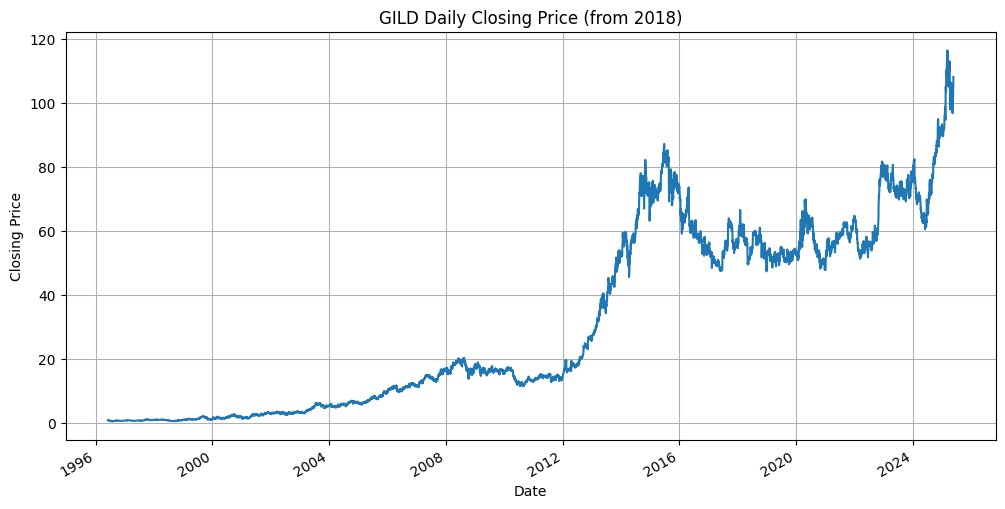

Number of technical indicators successfully added to GILD: 39


In [ ]:
# Apply technical indicators to each dataframe
for symbol, data in all_data.items():
    # Skip completely if DataFrame is empty or too small
    if len(data) <= 1:
        print(f"Warning: Ticker {symbol} has insufficient data (length={len(data)}). Skipping technical indicators.")
        continue

    # Rename columns if needed (ensure they match pandas_ta requirements)
    if data.columns[0] != 'open':  # Only rename if not already renamed
        data.columns = ['open', 'high', 'low', 'close', 'volume']

    indicator_count = 0  # Track the number of successfully added indicators

    # Trend Indicators
    try:
        data.ta.sma(length=100, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SMA to {symbol}: {e}")

    try:
        data.ta.ema(length=50, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding EMA to {symbol}: {e}")

    try:
        data.ta.wma(length=50, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding WMA to {symbol}: {e}")

    try:
        data.ta.hma(length=50, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding HMA to {symbol}: {e}")

    try:
        data.ta.vwma(length=50, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWMA to {symbol}: {e}")

    try:
        data.ta.macd(fast=24, slow=52, signal=18, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MACD to {symbol}: {e}")

    try:
        data.ta.adx(length=28, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ADX to {symbol}: {e}")

    try:
        data.ta.cci(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CCI to {symbol}: {e}")

    try:
        data.ta.rsi(length=28, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RSI to {symbol}: {e}")

    try:
        data.ta.stoch(k=28, d=6, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Stochastic Oscillator to {symbol}: {e}")

    try:
        data.ta.ichimoku(tenkan=18, kijun=52, senkou=104, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ichimoku Cloud to {symbol}: {e}")

    try:
        data.ta.supertrend(length=14, multiplier=4, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding SuperTrend to {symbol}: {e}")

    # Check for PSAR which needs more data
    try:
        if len(data) > 2:
            data.ta.psar(step=0.04, max_step=0.4, append=True)
            indicator_count += 1
        else:
            data['PSARl_0.02_0.2'] = float('nan')
            data['PSARs_0.02_0.2'] = float('nan')
    except Exception as e:
        print(f"Error adding PSAR to {symbol}: {e}")

    # Momentum Indicators
    try:
        data.ta.mom(length=50, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Momentum to {symbol}: {e}")

    try:
        data.ta.roc(length=30, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ROC to {symbol}: {e}")

    try:
        data.ta.willr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Williams %R to {symbol}: {e}")

    try:
        data.ta.uo(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ultimate Oscillator to {symbol}: {e}")

    try:
        data.ta.ao(fast=5, slow=34, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Awesome Oscillator to {symbol}: {e}")

    try:
        data.ta.kama(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding KAMA to {symbol}: {e}")

    try:
        data.ta.cg(length=10, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Center of Gravity to {symbol}: {e}")

    # Volatility Indicators
    try:
        data.ta.bbands(length=40, std=2, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Bollinger Bands to {symbol}: {e}")

    try:
        data.ta.atr(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding ATR to {symbol}: {e}")

    try:
        data.ta.kc(length=40, scalar=3, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Keltner Channel to {symbol}: {e}")

    try:
        data.ta.donchian(lower_length=40, upper_length=40, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Donchian Channel to {symbol}: {e}")

    try:
        data.ta.rvi(length=14, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding RVI to {symbol}: {e}")

    # Volume Indicators - OBV needs a length check
    try:
        if len(data) > 1:
            data.ta.obv(append=True)
            indicator_count += 1
        else:
            data['OBV'] = float('nan')
    except Exception as e:
        print(f"Error adding OBV to {symbol}: {e}")

    try:
        data.ta.cmf(length=30, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding CMF to {symbol}: {e}")

    try:
        data.ta.adosc(fast=5, slow=17, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding AD Oscillator to {symbol}: {e}")

    try:
        data.ta.mfi(length=28, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding MFI to {symbol}: {e}")

    try:
        data.ta.vwap(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding VWAP to {symbol}: {e}")

    try:
        data.ta.eom(length=28, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Ease of Movement to {symbol}: {e}")

    try:
        data.ta.nvi(length=255, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding NVI to {symbol}: {e}")

    # Other Indicators
    try:
        data.ta.squeeze(append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding TTM Squeeze to {symbol}: {e}")

    try:
        data.ta.fisher(length=18, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Fisher Transform to {symbol}: {e}")

    try:
        data.ta.decay(length=10, mode="linear", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Linear Decay to {symbol}: {e}")

    try:
        data.ta.decay(length=10, mode="exponential", append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Exponential Decay to {symbol}: {e}")

    try:
        data.ta.vortex(length=28, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Vortex Indicator to {symbol}: {e}")

    try:
        data.ta.zscore(length=40, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Z-Score to {symbol}: {e}")

    try:
        data.ta.entropy(length=20, append=True)
        indicator_count += 1
    except Exception as e:
        print(f"Error adding Entropy to {symbol}: {e}")

    print(f"\nData for {symbol}:")
    print(data.head())  # Print the first few rows of the dataset

    # Plot the data
    data['close'].plot(figsize=(12, 6), title=f'{symbol} Daily Closing Price (from 2018)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

    # Print the number of technical indicators added
    print(f"Number of technical indicators successfully added to {symbol}: {indicator_count}")

In [ ]:
for symbol, data in all_data.items():
    # Get the original column names
    original_columns = data.columns.tolist()
    # Create the new column names with the symbol prefix
    new_columns = [f"{symbol}_{col}" for col in original_columns]
    # Rename the columns in the DataFrame
    data.columns = new_columns
    print(f"\nColumns for {symbol} after renaming:")
    print(data.columns)


Columns for QQQ after renaming:
Index(['QQQ_open', 'QQQ_high', 'QQQ_low', 'QQQ_close', 'QQQ_volume',
       'QQQ_SMA_100', 'QQQ_EMA_50', 'QQQ_WMA_50', 'QQQ_HMA_50', 'QQQ_VWMA_50',
       'QQQ_MACD_24_52_18', 'QQQ_MACDh_24_52_18', 'QQQ_MACDs_24_52_18',
       'QQQ_ADX_28', 'QQQ_DMP_28', 'QQQ_DMN_28', 'QQQ_CCI_20_0.015',
       'QQQ_RSI_28', 'QQQ_STOCHk_28_6_3', 'QQQ_STOCHd_28_6_3', 'QQQ_ISA_18',
       'QQQ_ISB_52', 'QQQ_ITS_18', 'QQQ_IKS_52', 'QQQ_ICS_52',
       'QQQ_SUPERT_14_4.0', 'QQQ_SUPERTd_14_4.0', 'QQQ_SUPERTl_14_4.0',
       'QQQ_SUPERTs_14_4.0', 'QQQ_PSARl_0.02_0.2', 'QQQ_PSARs_0.02_0.2',
       'QQQ_PSARaf_0.02_0.2', 'QQQ_PSARr_0.02_0.2', 'QQQ_MOM_50', 'QQQ_ROC_30',
       'QQQ_WILLR_14', 'QQQ_UO_7_14_28', 'QQQ_AO_5_34', 'QQQ_KAMA_10_2_30',
       'QQQ_CG_10', 'QQQ_BBL_40_2.0', 'QQQ_BBM_40_2.0', 'QQQ_BBU_40_2.0',
       'QQQ_BBB_40_2.0', 'QQQ_BBP_40_2.0', 'QQQ_ATRr_14', 'QQQ_KCLe_40_3.0',
       'QQQ_KCBe_40_3.0', 'QQQ_KCUe_40_3.0', 'QQQ_DCL_40_40', 'QQQ_DCM_40_40',
       

In [ ]:

dataframes_to_join = []

for symbol, data in all_data.items():
    dataframes_to_join.append(data)

merged_data = pd.concat(dataframes_to_join, axis=1)

print("\nMerged DataFrame head:")
print(merged_data.head())

print("\nMerged DataFrame info:")
merged_data.info()


Merged DataFrame head:
            QQQ_open  QQQ_high  QQQ_low  QQQ_close  QQQ_volume  QQQ_SMA_100  \
Date                                                                          
1996-06-03       NaN       NaN      NaN        NaN         NaN          NaN   
1996-06-04       NaN       NaN      NaN        NaN         NaN          NaN   
1996-06-05       NaN       NaN      NaN        NaN         NaN          NaN   
1996-06-06       NaN       NaN      NaN        NaN         NaN          NaN   
1996-06-07       NaN       NaN      NaN        NaN         NaN          NaN   

            QQQ_EMA_50  QQQ_WMA_50  QQQ_HMA_50  QQQ_VWMA_50  ...  GILD_SQZ_ON  \
Date                                                         ...                
1996-06-03         NaN         NaN         NaN          NaN  ...            0   
1996-06-04         NaN         NaN         NaN          NaN  ...            0   
1996-06-05         NaN         NaN         NaN          NaN  ...            0   
1996-06-06       

In [ ]:
merged_data


,QQQ_open,QQQ_high,QQQ_low,QQQ_close,QQQ_volume,QQQ_SMA_100,QQQ_EMA_50,QQQ_WMA_50,QQQ_HMA_50,QQQ_VWMA_50,...,GILD_SQZ_ON,GILD_SQZ_OFF,GILD_SQZ_NO,GILD_FISHERT_18_1,GILD_FISHERTs_18_1,GILD_LDECAY_10,GILD_VTXP_28,GILD_VTXM_28,GILD_ZS_40,GILD_ENTP_20
Date,,,,,,,,,,,,,,,,,,,,,
1996-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,0.770144,NaN,NaN,NaN,NaN
1996-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,0.753521,NaN,NaN,NaN,NaN
1996-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,0.759062,NaN,NaN,NaN,NaN
1996-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,0.753521,NaN,NaN,NaN,NaN
1996-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,0.698115,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,519.250000,521.929993,515.169983,516.520020,50153300.0,495.582244,481.063027,472.949313,485.301730,463.785600,...,1,0,0,-0.914394,-0.926241,100.830000,0.805609,0.947608,-1.317586,4.255623
2025-05-16,521.510010,521.700012,517.099976,520.659973,48394600.0,495.593082,482.615848,474.888329,490.784992,464.194430,...,1,0,0,-0.775910,-0.914394,100.610001,0.854721,0.906145,-1.003143,4.256144
2025-05-19,522.010010,522.530029,514.239990,514.239990,52536200.0,495.646888,483.856011,476.553850,496.010581,464.732996,...,1,0,0,-0.406602,-0.775910,103.000000,0.869814,0.851342,-0.407243,4.260913


In [ ]:
data

,GILD_open,GILD_high,GILD_low,GILD_close,GILD_volume,GILD_SMA_100,GILD_EMA_50,GILD_WMA_50,GILD_HMA_50,GILD_VWMA_50,...,GILD_SQZ_ON,GILD_SQZ_OFF,GILD_SQZ_NO,GILD_FISHERT_18_1,GILD_FISHERTs_18_1,GILD_LDECAY_10,GILD_VTXP_28,GILD_VTXM_28,GILD_ZS_40,GILD_ENTP_20
Date,,,,,,,,,,,,,,,,,,,,,
1996-06-03,0.756292,0.775684,0.747981,0.770144,5644800,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,0.770144,NaN,NaN,NaN,NaN
1996-06-04,0.759062,0.781225,0.747981,0.753521,4844800,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,0.753521,NaN,NaN,NaN,NaN
1996-06-05,0.745210,0.770144,0.731359,0.759062,4803200,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,0.759062,NaN,NaN,NaN,NaN
1996-06-06,0.725819,0.753521,0.687034,0.753521,9353600,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,0.753521,NaN,NaN,NaN,NaN
1996-06-07,0.698115,0.731359,0.681494,0.698115,8016000,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,0.698115,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,100.339996,100.620003,97.860001,99.529999,9678900,102.067847,103.718349,104.179533,100.196245,106.185176,...,1,0,0,-0.914394,-0.926241,100.830000,0.805609,0.947608,-1.317586,4.255623
2025-05-16,102.500000,102.550003,100.230003,100.610001,6398400,102.176247,103.596453,103.946514,99.963991,105.982090,...,1,0,0,-0.775910,-0.914394,100.610001,0.854721,0.906145,-1.003143,4.256144
2025-05-19,106.160004,106.250000,102.839996,103.000000,8561400,102.303384,103.573063,103.818236,99.854211,105.670377,...,1,0,0,-0.406602,-0.775910,103.000000,0.869814,0.851342,-0.407243,4.260913


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import iqr

def fill_nan_with_rolling_median(data, window_size=21):
    """
    Fill NaN values in a DataFrame using forward fill first, then rolling median.
    Any remaining NaNs (e.g., at the start) are set to zero.
    """
    # Forward fill first
    data_ffill = data.ffill()
    # Fill remaining NaNs with rolling median
    data_filled = data_ffill.apply(lambda x: x.fillna(x.rolling(window=window_size, min_periods=1).median()), axis=0)
    # Fill any remaining NaNs (e.g., at the very start) with zero
    data_filled = data_filled.fillna(0)
    return data_filled

# Usage example with your existing pipeline
# First handle missing values
merged_data_filled = fill_nan_with_rolling_median(merged_data.copy(), window_size=21)

In [ ]:
merged_data_filled.describe()

,QQQ_open,QQQ_high,QQQ_low,QQQ_close,QQQ_volume,QQQ_SMA_100,QQQ_EMA_50,QQQ_WMA_50,QQQ_HMA_50,QQQ_VWMA_50,...,GILD_SQZ_ON,GILD_SQZ_OFF,GILD_SQZ_NO,GILD_FISHERT_18_1,GILD_FISHERTs_18_1,GILD_LDECAY_10,GILD_VTXP_28,GILD_VTXM_28,GILD_ZS_40,GILD_ENTP_20
count,7290.000000,7290.000000,7290.000000,7290.000000,7.290000e+03,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,...,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000,7290.000000
mean,113.296970,114.191950,112.288335,113.286631,5.903210e+07,109.682432,111.499927,111.993187,112.800419,111.061359,...,0.368313,0.628944,0.002743,0.365957,0.365865,31.225058,0.836113,0.796995,0.255458,4.318771
std,126.624101,127.513465,125.588731,126.595098,5.009189e+07,123.026583,124.758480,125.466972,126.647326,124.347074,...,0.482380,0.483121,0.052310,1.945229,1.945231,28.676922,0.105285,0.111810,1.322769,0.332874
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.218663,-7.218663,0.382302,0.000000,0.000000,-5.051536,0.000000
25%,32.711115,33.051387,32.421455,32.699882,2.549190e+07,32.004274,32.385977,32.279892,32.253569,32.207201,...,0.000000,0.000000,0.000000,-1.021574,-1.021574,4.940220,0.773121,0.734374,-0.784059,4.278491
50%,53.947910,54.805494,53.203838,54.040364,4.688470e+07,52.690781,53.863037,53.606929,53.647732,53.020540,...,0.000000,1.000000,0.000000,0.410424,0.409657,16.520736,0.842596,0.803938,0.358238,4.340277
75%,152.658890,154.449464,151.044093,153.018089,8.179450e+07,148.663710,153.513357,153.488303,152.376619,153.227426,...,1.000000,1.000000,0.000000,1.705343,1.705343,56.898371,0.902676,0.868881,1.280130,4.401217
max,538.716675,540.004732,535.661234,538.926283,6.167723e+08,512.309564,521.496363,524.371410,531.317297,521.971729,...,1.000000,1.000000,1.000000,7.597663,7.597663,116.432816,1.158872,1.074355,5.043337,4.926776


In [ ]:
pd.set_option('display.max_rows', None)
merged_data_filled.isna().sum().transpose()

,0
QQQ_open,0
QQQ_high,0
QQQ_low,0
QQQ_close,0
QQQ_volume,0
QQQ_SMA_100,0
QQQ_EMA_50,0
QQQ_WMA_50,0
QQQ_HMA_50,0
QQQ_VWMA_50,0


In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
print(merged_data_filled.shape)

(7290, 1846)


In [ ]:


# Print statistics to prove no NaNs remain
print('NaN count per column after filling:')
print(merged_data_filled.isna().sum())
print('Any NaNs left in data:', merged_data_filled.isna().any().any())
print('Any zeros in data:', (merged_data_filled == 0).any().any())

class FeatureScaler(BaseEstimator, TransformerMixin):
    """
    Automatically detects and applies optimal scaling for financial time series features.
    Handles mixed-scale features like RSI (0-100) and ATR (volatility) without hardcoding.
    """

    def __init__(self):
        self.scalers = {}
        self.feature_stats = {}

    def _auto_detect_scaler(self, data):
        """Heuristic-based scaler selection using financial data characteristics"""
        # Calculate distribution properties
        q1, q3 = np.percentile(data, [25, 75])
        iqr_val = q3 - q1
        range_val = np.max(data) - np.min(data)
        has_outliers = (iqr_val > 0) and (range_val / iqr_val > 4)

        # Check for common financial indicator ranges
        is_bounded = (
            (np.min(data) >= 0) and
            (np.max(data) <= 100) and
            (range_val >= 50)  # Typical for RSI-like features
        )

        if is_bounded:
            return MinMaxScaler(feature_range=(0, 1)), 'minmax'
        elif has_outliers:
            return RobustScaler(), 'robust'
        else:
            return StandardScaler(), 'standard'

    def fit(self, X, y=None):
        for col in X.columns:
            column_data = X[col].values.reshape(-1, 1)
            scaler, scaler_type = self._auto_detect_scaler(column_data)
            self.scalers[col] = scaler.fit(column_data)

            # Store metadata for MLOps monitoring
            self.feature_stats[col] = {
                'min': np.min(column_data),
                'max': np.max(column_data),
                'iqr': iqr(column_data),
                'scaler': scaler_type
            }
        return self

    def transform(self, X):
        X_scaled = X.copy()
        for col, scaler in self.scalers.items():
            X_scaled[col] = scaler.transform(X_scaled[col].values.reshape(-1, 1)).flatten()
        return X_scaled

    def get_feature_stats(self):
        """For MLOps monitoring and model interpretation"""
        return pd.DataFrame(self.feature_stats).T



NaN count per column after filling:
QQQ_open          0
QQQ_high          0
QQQ_low           0
QQQ_close         0
QQQ_volume        0
                 ..
GILD_LDECAY_10    0
GILD_VTXP_28      0
GILD_VTXM_28      0
GILD_ZS_40        0
GILD_ENTP_20      0
Length: 1846, dtype: int64
Any NaNs left in data: False
Any zeros in data: True


In [ ]:
# Define the target column
target_column = 'QQQ_close'  # Replace with your actual target column name

# Instantiate the FeatureScaler
feature_scaler = FeatureScaler()

# Fit the scaler to the data excluding the target column
feature_scaler.fit(merged_data_filled.drop(columns=[target_column]))

# Transform the data excluding the target column
scaled_features = feature_scaler.transform(merged_data_filled.drop(columns=[target_column]))

# Combine the scaled features with the unscaled target column
scaled_data_df = pd.DataFrame(scaled_features, columns=merged_data_filled.columns.drop(target_column), index=merged_data_filled.index)
scaled_data_df[target_column] = merged_data_filled[target_column]


In [ ]:
scaled_data_df

,QQQ_open,QQQ_high,QQQ_low,QQQ_volume,QQQ_SMA_100,QQQ_EMA_50,QQQ_WMA_50,QQQ_HMA_50,QQQ_VWMA_50,QQQ_MACD_24_52_18,...,GILD_SQZ_OFF,GILD_SQZ_NO,GILD_FISHERT_18_1,GILD_FISHERTs_18_1,GILD_LDECAY_10,GILD_VTXP_28,GILD_VTXM_28,GILD_ZS_40,GILD_ENTP_20,QQQ_close
Date,,,,,,,,,,,,,,,,,,,,,
1996-06-03,-0.449762,-0.451453,-0.448513,-0.832727,-0.451663,-0.444681,-0.442271,-0.446606,-0.438113,-0.288987,...,-1.301925,19.065676,-0.150508,-0.150227,-1.062074,-6.503785,-5.976919,-0.173549,-35.365537,0.000000
1996-06-04,-0.449762,-0.451453,-0.448513,-0.832727,-0.451663,-0.444681,-0.442271,-0.446606,-0.438113,-0.288987,...,-1.301925,19.065676,-0.150508,-0.150227,-1.062653,-6.503785,-5.976919,-0.173549,-35.365537,0.000000
1996-06-05,-0.449762,-0.451453,-0.448513,-0.832727,-0.451663,-0.444681,-0.442271,-0.446606,-0.438113,-0.288987,...,-1.301925,19.065676,-0.150508,-0.150227,-1.062460,-6.503785,-5.976919,-0.173549,-35.365537,0.000000
1996-06-06,-0.449762,-0.451453,-0.448513,-0.832727,-0.451663,-0.444681,-0.442271,-0.446606,-0.438113,-0.288987,...,-1.301925,19.065676,-0.150508,-0.150227,-1.062653,-6.503785,-5.976919,-0.173549,-35.365537,0.000000
1996-06-07,-0.449762,-0.451453,-0.448513,-0.832727,-0.451663,-0.444681,-0.442271,-0.446606,-0.438113,-0.288987,...,-1.301925,19.065676,-0.150508,-0.150227,-1.064586,-6.503785,-5.976919,-0.173549,-35.365537,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,3.879206,3.847874,3.894418,0.058054,3.796448,3.526866,3.459681,3.593432,3.394185,1.033680,...,-1.301925,-0.052450,-0.485830,-0.489893,2.427378,-0.285493,1.068115,-0.811856,-0.689781,516.520020
2025-05-16,3.898047,3.845980,3.910688,0.026818,3.796541,3.539685,3.475678,3.639079,3.397563,2.043977,...,-1.301925,-0.052450,-0.435046,-0.485549,2.419705,0.093587,0.759863,-0.659523,-0.685539,520.659973
2025-05-19,3.902216,3.852817,3.886578,0.100377,3.797002,3.549924,3.489419,3.682581,3.402014,2.749302,...,-1.301925,-0.052450,-0.299615,-0.434764,2.503053,0.210092,0.352420,-0.370838,-0.646683,514.239990


if doing below i will triple features in short medium long



Key Feature Selection Techniques by López de Prado
1. Mean Decrease Accuracy (MDA)
MDA assesses the importance of each feature by measuring the impact on model performance when the feature's values are randomly shuffled. If shuffling a feature leads to a significant drop in performance, the feature is considered important. This method is efficient as it doesn't require retraining the model for each feature. An implementation example is available on the Numerai Forum.
Numerai Forum
Numerai Forum
+2
Numerai Forum
+2
Numerai Forum
+2

2. Mean Decrease Impurity (MDI)
MDI evaluates feature importance based on the total decrease in impurity (e.g., Gini impurity) that each feature contributes across all decision trees in an ensemble model. However, López de Prado cautions that MDI can be biased, especially in datasets with correlated features, and should be used judiciously.

3. Single Feature Importance (SFI)
SFI involves training separate models using individual features and assessing their standalone predictive power. While this method helps in identifying features with strong individual signals, it may overlook interactions between features.
GitHub
+12
Numerai Forum
+12
Medium
+12
Medium

4. Clustered Feature Importance (CFI)
CFI addresses the issue of multicollinearity by clustering correlated features and evaluating the importance of these clusters rather than individual features. This approach provides a more holistic view of feature importance in the presence of correlated variables.

In [ ]:
from sklearn.model_selection import train_test_split
import os
import pandas as pd

target_column = 'QQQ_close' # < remove hardcording to make any symbol feasible at target stock price ?

columns_to_drop = ['QQQ_high', 'QQQ_low', 'QQQ_open']

if target_column in scaled_data_df.columns:
    scaled_data_df['QQQ_target'] = scaled_data_df[target_column].shift(-1)

    scaled_data_df.dropna(subset=['QQQ_target'], inplace=True)

    X = scaled_data_df.drop(columns=['QQQ_target', target_column] + columns_to_drop, errors='ignore') # Add columns to drop
    y = scaled_data_df['QQQ_target']

    train_size = int(len(scaled_data_df) * 0.8)

    X_train = X.iloc[:train_size]
    X_test = X.iloc[train_size:]
    y_train = y.iloc[:train_size]
    y_test = y.iloc[train_size:]

    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    output_dir = 'data_split'

    if os.path.exists(output_dir):
      import shutil
      shutil.rmtree(output_dir)
    os.makedirs(output_dir)

    X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=True) # Include index for timestamp
    X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=True)   # Include index for timestamp
    y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=True, header=True) # Include index and header
    y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=True, header=True)     # Include index and header

    print(f"Training and testing data saved to CSV files in the '{output_dir}' directory.")
    print(f"- {os.path.join(output_dir, 'X_train.csv')}")
    print(f"- {os.path.join(output_dir, 'X_test.csv')}")
    print(f"- {os.path.join(output_dir, 'y_train.csv')}")
    print(f"- {os.path.join(output_dir, 'y_test.csv')}")

else:
    print(f"Target column '{target_column}' not found in the DataFrame.")
    print("Please ensure the target column name is correct.")

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import xgboost as xgb

In [ ]:
def purged_kfold_split(data, n_splits=5, purging_window=timedelta(days=1)):

        kf = KFold(n_splits=n_splits)
        indices = np.arange(len(data))
        dates = data.index

        for train_index, test_index in kf.split(indices):
            test_start_date = dates[test_index[0]]
            test_end_date = dates[test_index[-1]]

            purge_start_date = test_start_date - purging_window
            purge_end_date = test_end_date + purging_window

            train_mask = (dates[train_index] < purge_start_date) | (dates[train_index] > purge_end_date)

            purged_train_index = train_index[train_mask]

            yield purged_train_index, test_index

change the model training to XGB, LSTM (with layers added and remove in optimizing?, SVM, ARIMA GARCH+ML, CNN+LSTM? )

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import optuna
from datetime import timedelta
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

# Purged K-Fold implementation (López de Prado method)
def purged_kfold_split(data, n_splits=5, purging_window=timedelta(days=1)):
    """
    Implementation of Purged K-fold cross-validation following Marcos López de Prado's
    methodology to prevent forward-looking bias in financial time series.

    Parameters:
    -----------
    data : DataFrame with DatetimeIndex
        The data to split
    n_splits : int, default=5
        Number of folds
    purging_window : timedelta, default=timedelta(days=1)
        Window to purge around test set

    Returns:
    --------
    Generator of train_indices, test_indices for each fold
    """
    kf = KFold(n_splits=n_splits)
    indices = np.arange(len(data))
    dates = data.index

    for train_index, test_index in kf.split(indices):
        test_start_date = dates[test_index[0]]
        test_end_date = dates[test_index[-1]]

        purge_start_date = test_start_date - purging_window
        purge_end_date = test_end_date + purging_window

        train_mask = (dates[train_index] < purge_start_date) | (dates[train_index] > purge_end_date)

        purged_train_index = train_index[train_mask]

        yield purged_train_index, test_index

# Walk-Forward Validation for final model evaluation
class WalkForwardValidator:
    def __init__(self, window_size=252, test_period=21):
        self.window_size = window_size
        self.test_period = test_period

    def split(self, X, y):
        """Generate walk-forward splits with daily testing and monthly retraining"""
        total_size = len(X)
        start_idx = 0

        while start_idx + self.window_size + self.test_period <= total_size:
            train_end = start_idx + self.window_size
            test_end = train_end + self.test_period

            # Yield daily test sets within the test period
            for test_start in range(train_end, test_end):
                yield (
                    X.iloc[start_idx:train_end],
                    y.iloc[start_idx:train_end],
                    X.iloc[test_start:test_start + 1],
                    y.iloc[test_start:test_start + 1]
                )

            # Move the training window forward by the test period
            start_idx += self.test_period

def create_objective(model_type):
    def objective(trial):
        # Load data (already scaled)
        X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
        y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()

        # Define parameters only for the model being optimized
        if model_type == 'xgboost':
            params = {
                'objective': 'reg:squarederror',
                'n_estimators': trial.suggest_int('n_estimators', 100, 300),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'subsample': trial.suggest_float('subsample', 0.5, 0.8),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.7),
                'gamma': trial.suggest_float('gamma', 0, 5),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
                'reg_lambda': trial.suggest_float('reg_lambda', 0, 2.0),
                'random_state': 42
            }

            def fit_predict(X_train, y_train, X_test):
                model = xgb.XGBRegressor(**params)
                model.fit(X_train, y_train)
                return model.predict(X_test)

        elif model_type == 'svm':
            kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
            params = {
                'C': trial.suggest_float('C', 0.1, 10.0, log=True),
                'epsilon': trial.suggest_float('epsilon', 0.01, 0.5),
                'kernel': kernel,
                'max_iter': 1000
            }
            if kernel == 'rbf':
                params['gamma'] = trial.suggest_float('gamma', 1e-3, 1.0, log=True)

            import logging

            logging.basicConfig(level=logging.INFO)

            def fit_predict(X_train, y_train, X_test):
                try:
                    logging.info(f"Starting SVM trial with params: {params}")
                    y_train_1d = np.ravel(y_train)
                    model = SVR(**params)
                    model.fit(X_train, y_train_1d)
                    return model.predict(X_test)
                except Exception as e:
                    print(f'SVM error: {e}')
                    return np.ones(len(X_test)) * y_train.mean()

        elif model_type == 'lstm':
            params = {
                'hidden_size': trial.suggest_int('hidden_size', 64, 256),
                'num_layers': trial.suggest_int('num_layers', 2, 4),
                'dropout': trial.suggest_float('dropout', 0.1, 0.5),
                'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True),
                'batch_size': 32,
                'epochs': 50
            }

            def fit_predict(X_train, y_train, X_test):
                try:
                    # Convert to tensors
                    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
                    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
                    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

                    # Simple LSTM model
                    model = nn.LSTM(
                        input_size=X_train.shape[1],
                        hidden_size=params['hidden_size'],
                        num_layers=params['num_layers'],
                        dropout=params['dropout'],
                        batch_first=True
                    )

                    fc = nn.Linear(params['hidden_size'], 1)
                    optimizer = torch.optim.Adam([*model.parameters(), *fc.parameters()],
                                              lr=params['learning_rate'])

                    # Train
                    model.train()
                    for _ in range(params['epochs']):
                        X_batch = X_train_tensor.unsqueeze(1)
                        outputs, _ = model(X_batch)
                        predictions = fc(outputs[:, -1, :])
                        loss = nn.MSELoss()(predictions, y_train_tensor)
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                    # Predict
                    model.eval()
                    with torch.no_grad():
                        X_test_batch = X_test_tensor.unsqueeze(1)
                        test_outputs, _ = model(X_test_batch)
                        predictions = fc(test_outputs[:, -1, :])
                        return predictions.numpy().flatten()
                except Exception as e:
                    print(f"LSTM error: {e}")
                    return np.ones(len(X_test)) * y_train.mean()

        elif model_type == 'arima_garch':
            params = {
                'p' : trial.suggest_int('p', 0, 8),
                'd' : trial.suggest_int('d', 0, 2),
                'q' : trial.suggest_int('q', 0, 8),
                'use_garch' : True
            }

            def fit_predict(X_train, y_train, X_test):
                try:
                    model = ARIMA(y_train, order=(params['p'], params['d'], params['q']))
                    results = model.fit()
                    return results.forecast(steps=len(X_test))
                except Exception as e:
                    print(f"ARIMA error: {e}")
                    return np.ones(len(X_test)) * y_train.mean()

        # Using purged k-fold for hyperparameter optimization
        # This follows López de Prado's approach for preventing leakage
        purging_window = timedelta(days=1)  # 1 trading day
        errors = []

        try:
            # Apply purged k-fold cross-validation
            for train_idx, test_idx in purged_kfold_split(X, n_splits=5, purging_window=purging_window):
                X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
                y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

                # Skip if not enough data
                if len(X_train_fold) < 50 or len(X_test_fold) < 5:
                    continue

                # Apply model
                y_pred = fit_predict(X_train_fold, y_train_fold, X_test_fold)

                # Calculate error
                error = mean_squared_error(y_test_fold, y_pred)
                errors.append(error)

            # Return mean error across all folds
            if not errors:
                return float('inf')
            return np.mean(errors)

        except Exception as e:
            print(f"Error in purged k-fold: {e}")
            return float('inf')

    return objective

# Function to evaluate final model performance using walk-forward validation
def evaluate_model(model_type, best_params):
    print(f"\n=== Evaluating {model_type.upper()} with Walk-Forward Validation ===")

    # Load data
    X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
    y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze()

    # Walk-forward validation
    validator = WalkForwardValidator(window_size=252, test_period=21)
    errors = []
    predictions = []

    print("Starting walk-forward validation...")

    # Create model with best parameters
    if model_type == 'xgboost':
        params = {**best_params, 'objective': 'reg:squarederror', 'random_state': 42}

        for X_train, y_train, X_test, y_test in validator.split(X, y):
            model = xgb.XGBRegressor(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            error = mean_squared_error(y_test, y_pred)
            errors.append(error)
            predictions.extend(list(zip(y_test.index, y_test, y_pred)))

    elif model_type == 'svm':
        params = best_params

        for X_train, y_train, X_test, y_test in validator.split(X, y):
            model = SVR(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            error = mean_squared_error(y_test, y_pred)
            errors.append(error)
            predictions.extend(list(zip(y_test.index, y_test, y_pred)))

    elif model_type == 'lstm':
        params = best_params

        for X_train, y_train, X_test, y_test in validator.split(X, y):
            try:
                # Convert to tensors
                X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
                y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
                X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

                # Simple LSTM model
                model = nn.LSTM(
                    input_size=X_train.shape[1],
                    hidden_size=params['hidden_size'],
                    num_layers=params['num_layers'],
                    dropout=params['dropout'],
                    batch_first=True
                )

                fc = nn.Linear(params['hidden_size'], 1)
                optimizer = torch.optim.Adam([*model.parameters(), *fc.parameters()],
                                          lr=params['learning_rate'])

                # Train
                model.train()
                for _ in range(params['epochs']):
                    X_batch = X_train_tensor.unsqueeze(1)
                    outputs, _ = model(X_batch)
                    predictions = fc(outputs[:, -1, :])
                    loss = nn.MSELoss()(predictions, y_train_tensor)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                # Predict
                model.eval()
                with torch.no_grad():
                    X_test_batch = X_test_tensor.unsqueeze(1)
                    test_outputs, _ = model(X_test_batch)
                    y_pred = fc(test_outputs[:, -1, :]).numpy().flatten()

                error = mean_squared_error(y_test, y_pred)
                errors.append(error)
                predictions.extend(list(zip(y_test.index, y_test, y_pred)))
            except Exception as e:
                print(f"LSTM error during evaluation: {e}")

    elif model_type == 'arima_garch':
        params = best_params

        for X_train, y_train, X_test, y_test in validator.split(X, y):
            try:
                model = ARIMA(y_train, order=(params['p'], params['d'], params['q']))
                results = model.fit()
                y_pred = results.forecast(steps=len(X_test))

                error = mean_squared_error(y_test, y_pred)
                errors.append(error)
                predictions.extend(list(zip(y_test.index, y_test, y_pred)))
            except Exception as e:
                print(f"ARIMA error during evaluation: {e}")

    # Store predictions for analysis
    if len(predictions) > 0:
        pred_df = pd.DataFrame(predictions, columns=['date', 'actual', 'predicted'])
        pred_df.to_csv(f'predictions_{model_type}_walkforward.csv', index=False)

    avg_error = np.mean(errors) if errors else float('inf')
    print(f"Average MSE: {avg_error:.6f}")
    return avg_error

# Run optimization
models = ['lstm', 'xgboost', 'svm', 'arima_garch', ]
best_models = {}

for model_type in models:
    print(f"\nOptimizing {model_type.upper()} using purged k-fold cross-validation...")
    study = optuna.create_study(direction='minimize')
    study.optimize(create_objective(model_type), n_trials=50)

    best_models[model_type] = {
        'value': study.best_trial.value,
        'params': study.best_trial.params
    }

    print(f"Best {model_type} trial:")
    print(f"  MSE: {study.best_trial.value:.6f}")
    print("  Params:", study.best_trial.params)

# Compare models using k-fold results
print("\n=== MODEL COMPARISON (Purged K-Fold) ===")
for model_type, results in sorted(best_models.items(), key=lambda x: x[1]['value']):
    print(f"{model_type.upper()}: MSE = {results['value']:.6f}")

# Evaluate best models with walk-forward validation
print("\n=== FINAL WALK-FORWARD EVALUATION ===")
walk_forward_results = {}

for model_type, results in best_models.items():
    wf_error = evaluate_model(model_type, results['params'])
    walk_forward_results[model_type] = wf_error

# Final comparison
print("\n=== FINAL MODEL COMPARISON (Walk-Forward) ===")
for model_type, error in sorted(walk_forward_results.items(), key=lambda x: x[1]):
    print(f"{model_type.upper()}: MSE = {error:.6f}")

[I 2025-05-21 18:50:27,156] A new study created in memory with name: no-name-33a8da57-0dea-4993-99a3-6d7a26a2662e



Optimizing LSTM using purged k-fold cross-validation...


[I 2025-05-21 18:51:41,407] Trial 0 finished with value: 4849.79713296899 and parameters: {'hidden_size': 119, 'num_layers': 2, 'dropout': 0.2233891648587878, 'learning_rate': 0.000497860391122143}. Best is trial 0 with value: 4849.79713296899.
[I 2025-05-21 18:53:01,582] Trial 1 finished with value: 5012.750166861566 and parameters: {'hidden_size': 93, 'num_layers': 4, 'dropout': 0.36695229845454524, 'learning_rate': 0.00047798144882969963}. Best is trial 0 with value: 4849.79713296899.
[I 2025-05-21 18:54:15,326] Trial 2 finished with value: 3405.9337777296023 and parameters: {'hidden_size': 63, 'num_layers': 3, 'dropout': 0.47833334318228615, 'learning_rate': 0.0066111608439998835}. Best is trial 2 with value: 3405.9337777296023.
[I 2025-05-21 18:55:27,683] Trial 3 finished with value: 5198.219180145471 and parameters: {'hidden_size': 98, 'num_layers': 3, 'dropout': 0.4280191470852851, 'learning_rate': 0.00012723166649235176}. Best is trial 2 with value: 3405.9337777296023.
[I 2025-

Best lstm trial:
  MSE: 2456.278592
  Params: {'hidden_size': 91, 'num_layers': 2, 'dropout': 0.30169353620917816, 'learning_rate': 0.009857718800174565}

Optimizing XGBOOST using purged k-fold cross-validation...


[I 2025-05-21 19:58:52,481] Trial 0 finished with value: 509.4257765063571 and parameters: {'n_estimators': 102, 'learning_rate': 0.09343957291170246, 'max_depth': 10, 'subsample': 0.6632714218863341, 'min_child_weight': 15, 'colsample_bytree': 0.3305109245743701, 'gamma': 1.3748959031727748, 'reg_alpha': 0.527024303265553, 'reg_lambda': 0.5447731652922878}. Best is trial 0 with value: 509.4257765063571.
[I 2025-05-21 19:59:34,968] Trial 1 finished with value: 502.45081621471655 and parameters: {'n_estimators': 174, 'learning_rate': 0.08123479349151468, 'max_depth': 3, 'subsample': 0.7685877922260105, 'min_child_weight': 3, 'colsample_bytree': 0.3894172093540207, 'gamma': 1.0565118665275293, 'reg_alpha': 0.5274433664670687, 'reg_lambda': 0.8541005903986101}. Best is trial 1 with value: 502.45081621471655.
[I 2025-05-21 20:00:35,400] Trial 2 finished with value: 505.1715880101375 and parameters: {'n_estimators': 143, 'learning_rate': 0.07177369244429366, 'max_depth': 6, 'subsample': 0.6

In [ ]:
my_stock_forecasting/
├── conf/
│   ├── base/
│   │   ├── catalog.yml         # Data Catalog definitions
│   │   ├── parameters/         # Parameters for data fetching, processing, and models
│   │   │   ├── data_fetching.yml
│   │   │   ├── data_processing.yml
│   │   │   ├── model_params/
│   │   │   │   ├── xgboost_params.yml
│   │   │   │   ├── svm_params.yml
│   │   │   │   ├── lstm_params.yml
│   │   │   │   └── arima_garch_params.yml
│   │   │   └── validation_params.yml # For purged k-fold and walk-forward
│   │   └── pipelines.yml         # Pipeline definitions
│   └── local/                  # Local overrides (e.g., API keys)
│       ├── catalog.yml
│       └── parameters.yml
├── docs/                       # Project documentation
├── src/
│   └── my_stock_forecasting/
│       ├── __init__.py
│       ├── hooks.py            # Optional: For customizing Kedro behavior
│       ├── pipeline.py         # Main pipeline definition
│       ├── pipelines/
│       │   ├── data_fetching/    # Pipeline for fetching raw data
│       │   │   ├── __init__.py
│       │   │   ├── nodes.py
│       │   │   └── pipeline.py
│       │   ├── data_processing/  # Pipeline for technical indicators and cleaning
│       │   │   ├── __init__.py
│       │   │   ├── nodes.py
│       │   │   └── pipeline.py
│       │   ├── data_splitting/   # Pipeline for splitting data
│       │   │   ├── __init__.py
│       │   │   ├── nodes.py
│       │   │   └── pipeline.py
│       │   └── model_training/   # Pipeline for training and evaluating models
│       │       ├── __init__.py
│       │       ├── nodes.py
│       │       └── pipeline.py
│       ├── tests/                # Unit and integration tests
│       │   ├── __init__.py
│       │   ├── pipelines/
│       │   │   ├── data_fetching/
│       │   │   │   └── test_nodes.py
│       │   │   ├── data_processing/
│       │   │   │   └── test_nodes.py
│       │   │   ├── data_splitting/
│       │   │   │   └── test_nodes.py
│       │   │   └── model_training/
│       │   │       └── test_nodes.py
│       │   └── test_pipeline.py  # Integration tests
│       └── util/                 # Utility functions (e.g., purged_kfold_split)
│           ├── __init__.py
│           └── validation_utils.py
├── .gitignore
├── pyproject.toml              # Project dependencies and metadata
├── README.md
└── notebooks/                  # Original notebooks (for reference, not run by Kedro)
    └── stock_forecasting.ipynb

Detailed Breakdown and Advice:

conf/:

catalog.yml: Define all your data inputs and outputs here.
raw_data: Use APIDataSet (if available or implement a custom one) or a CSVDataSet to store the fetched data per symbol. You could have separate entries for each symbol's raw data.
processed_data: CSVDataSet to store the data with technical indicators and cleaned NaNs. You might have an entry for the merged DataFrame.
X_train, X_test, y_train, y_test: CSVDataSet to store the split data.
best_models: JSONDataSet or a custom PickleDataSet to save the best hyperparameters found by Optuna for each model type.
walk_forward_predictions: CSVDataSet to store the predictions from the walk-forward validation for analysis.
parameters/: Organize your parameters logically.
data_fetching.yml: API keys (use local/ for sensitive keys), list of symbols, start date.
data_processing.yml: Window sizes for rolling calculations, parameters for specific technical indicators.
model_params/: Separate files for hyperparameters of each model type (XGBoost, SVM, LSTM, ARIMA+GARCH).
validation_params.yml: Number of splits for purged k-fold, purging window size, walk-forward window size and test period.
pipelines.yml: Define the order and dependencies of your pipelines.
src/my_stock_forecasting/:

pipeline.py: This is where you assemble your individual pipelines into a master pipeline that defines the overall workflow.
pipelines/data_fetching/:
nodes.py:
A node to fetch data using yfinance for a given symbol and save it to the data catalog.
A node to merge the individual symbol DataFrames into a single DataFrame.
pipeline.py: Define the sequence of nodes for fetching and merging data.
pipelines/data_processing/:
nodes.py:
A node to apply technical indicators using pandas_ta. This node should take the merged raw data and parameters for which indicators and lengths to apply.
A node to rename columns with the symbol prefix.
A node to handle missing values (e.g., using your fill_nan_with_rolling_median function).
A node to apply the FeatureScaler (implement this as a scikit-learn compatible transformer or a simple node that takes the scaler object and data).
pipeline.py: Define the sequence of nodes for processing the data.
pipelines/data_splitting/:
nodes.py:
A node to create the target column and drop initial NaNs.
A node to split the data into training and testing sets based on a date or percentage split. This node should output X_train, X_test, y_train, y_test.
pipeline.py: Define the sequence of nodes for splitting the data.
pipelines/model_training/:
nodes.py:
Optimization Nodes (one per model type):
These nodes will take X_train and y_train as input and use Optuna with your create_objective function and purged_kfold_split utility to find the best hyperparameters for each model.
They should output the best hyperparameters (e.g., as a dictionary or a serialized object).
Evaluation Nodes (one per model type):
These nodes will take X_train, y_train, the best hyperparameters for that model type, and the validation parameters (window sizes, etc.) as input.
They will perform the walk-forward validation using your WalkForwardValidator.
They should output the evaluation metric (e.g., average MSE) and potentially save the predictions from the walk-forward validation.
pipeline.py: Define the sequence of optimization and evaluation nodes for each model type. You might have parallel branches in your pipeline for optimizing different models simultaneously.
util/:
validation_utils.py: Move your purged_kfold_split and WalkForwardValidator classes/functions here.
Refinements and Deep Dive for a Senior Data Engineer:

Custom DataSets: For fetching data from Alpha Vantage (as in your commented code) or other APIs, consider creating custom Kedro DataSets. This encapsulates the data fetching logic and makes it reusable across projects.
Feature Scaling as a Transformer: Implement your FeatureScaler as a proper scikit-learn BaseEstimator, TransformerMixin. This allows it to be easily integrated into scikit-learn pipelines if you were to use those within your Kedro nodes.
Parameter Tuning with Optuna: Your current Optuna setup is within the objective function. While this works, consider creating a dedicated Kedro node for parameter tuning that takes the training data, the model class, and the parameter search space as inputs and outputs the best parameters. This promotes reusability.
Modular Model Definition: Instead of having model logic directly within the optimization objective, consider creating functions or classes for each model type (XGBoost, SVM, LSTM, ARIMA+GARCH) that handle fitting and prediction. This makes your code cleaner and easier to test.
LSTM Implementation Details:
Time Series Data Preparation: For LSTM, you typically need to reshape your data into sequences ((samples, time_steps, features)). Create a dedicated node or utility function to handle this transformation.
PyTorch Integration: Your PyTorch LSTM implementation is good. Ensure you handle device placement (CPU/GPU) appropriately in a production environment.
Saving/Loading Models: Use torch.save and torch.load within Kedro nodes to persist your trained LSTM models.
ARIMA+GARCH Considerations:
statsmodels and arch Integration: Your current arima_garch objective only uses ARIMA. To fully implement ARIMA+GARCH, you would typically fit an ARIMA model to the time series, analyze the residuals for heteroskedasticity, and then fit a GARCH model to the residuals. This requires a more complex Kedro node or sequence of nodes.
Iterative Fitting: ARIMA and GARCH are often fitted iteratively on a moving window for time series forecasting. Your walk-forward validation framework is suitable for this.
MLOps Integration (Further Steps):
Experiment Tracking: Integrate MLflow or other experiment tracking tools within your model training nodes to log parameters, metrics, and trained models.
Model Registry: Use a model registry to manage different versions of your trained models.
Deployment: Plan how you would deploy your best-performing model for making predictions. This might involve creating a prediction pipeline in Kedro or deploying the model as a microservice.
Testing Strategy:
Unit Tests: Write unit tests for individual nodes to verify their core logic (e.g., testing the technical indicator calculation node with sample data).
Integration Tests: Write integration tests for your pipelines to ensure that nodes connect correctly and data flows as expected.
Data Validation: Implement data validation steps using libraries like pandera or Great Expectations within your nodes to check the schema, range, and quality of your data at different stages.
Documentation: Write clear documentation for your project, including the data sources, data processing steps, models used, and how to run the Kedro pipelines.
By following this structure and advice, you can transform your Colab notebook into a robust, maintainable, and scalable data science project using Kedro, leveraging your 15 years of data engineering experience to build a solid foundation for production deployment and MLOps.

In [ ]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# import optuna
# from datetime import timedelta
# from sklearn.metrics import mean_squared_error
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingRegressor

# # Define a function to create an objective function for each model type
# def create_objective(model_type):
#     def objective(trial):
#         X = pd.read_csv('data_split/X_train.csv', index_col=0, parse_dates=True)
#         y = pd.read_csv('data_split/y_train.csv', index_col=0, parse_dates=True).squeeze() # Use squeeze to get a Series

#         # Define parameters based on model type
#         if model_type == 'xgboost':
#             params = {
#                 'objective': 'reg:squarederror',
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#                 'max_depth': trial.suggest_int('max_depth', 5, 15),
#                 'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#                 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
#                 'gamma': trial.suggest_float('gamma', 0, 0.5),
#                 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#                 'random_state': 42
#             }
#             model_class = xgb.XGBRegressor

#         elif model_type == 'random_forest':
#             params = {
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'max_depth': trial.suggest_int('max_depth', 5, 30),
#                 'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'max_features': trial.suggest_float('max_features', 0.3, 1.0),
#                 'random_state': 42
#             }
#             model_class = RandomForestRegressor

#         elif model_type == 'extra_trees':
#             params = {
#                 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#                 'max_depth': trial.suggest_int('max_depth', 5, 30),
#                 'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'max_features': trial.suggest_float('max_features', 0.3, 1.0),
#                 'random_state': 42
#             }
#             model_class = ExtraTreesRegressor

#         elif model_type == 'hist_gradient_boosting':
#             params = {
#                 'max_iter': trial.suggest_int('max_iter', 100, 1000),
#                 'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#                 'max_depth': trial.suggest_int('max_depth', 5, 15),
#                 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#                 'l2_regularization': trial.suggest_float('l2_regularization', 0, 10),
#                 'random_state': 42
#             }
#             model_class = HistGradientBoostingRegressor

#         n_splits = 3
#         purging_window = timedelta(days=5) # Adjust as needed
#         fold_errors = []

#         # Perform purged k-fold cross-validation
#         for train_indices, test_indices in purged_kfold_split(X, n_splits=n_splits, purging_window=purging_window):
#             X_train_fold, X_test_fold = X.iloc[train_indices], X.iloc[test_indices]
#             y_train_fold, y_test_fold = y.iloc[train_indices], y.iloc[test_indices]

#             model = model_class(**params)
#             model.fit(X_train_fold, y_train_fold)

#             y_pred_fold = model.predict(X_test_fold)
#             mse = mean_squared_error(y_test_fold, y_pred_fold)
#             fold_errors.append(mse)

#         return np.mean(fold_errors)

#     return objective

# # Dictionary to store the best trials for each model
# best_models = {}

# # List of models to evaluate
# models = ['xgboost', 'random_forest', 'extra_trees', 'hist_gradient_boosting']

# # Run optimization for each model
# for model_type in models:
#     print(f"\n\nOptimizing {model_type.upper()}...")
#     study = optuna.create_study(direction='minimize', study_name=model_type)
#     study.optimize(create_objective(model_type), n_trials=150)

#     print(f"Best {model_type} trial:")
#     print(f"  Value: {study.best_trial.value}")
#     print("  Params: ")
#     for key, value in study.best_trial.params.items():
#         print(f"    {key}: {value}")

#     # Store the best trial
#     best_models[model_type] = {
#         'value': study.best_trial.value,
#         'params': study.best_trial.params
#     }

# # Compare all models
# print("\n\n=== MODEL COMPARISON ===")
# for model_type, results in sorted(best_models.items(), key=lambda x: x[1]['value']):
#     print(f"{model_type.upper()}: MSE = {results['value']:.6f}")

# # Identify the best overall model
# best_model = min(best_models.items(), key=lambda x: x[1]['value'])
# print(f"\nBest overall model: {best_model[0].upper()} with MSE = {best_model[1]['value']:.6f}")